In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
import timeit
import time
import scipy.signal
from scipy.signal import lfilter
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import chi2

In [2]:
print("Read data.....")
dataImport = pd.read_csv('data_siap.csv', sep=",")

Read data.....


In [3]:
status = dataImport.covid_status !=2
data2cov = dataImport[status]
data2cov

,Timestamp,PROCESS,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sampling_id,device_id,covid_status
0,15/03/2021 13:15,1,199,378,449,534,659,583,287,407,1028,11,0
1,15/03/2021 13:15,1,194,369,451,532,664,588,289,404,1028,11,0
2,15/03/2021 13:15,1,190,359,445,530,666,588,285,397,1028,11,0
3,15/03/2021 13:15,1,187,352,439,527,667,586,283,393,1028,11,0
4,15/03/2021 13:15,1,187,348,438,527,677,584,282,393,1028,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
686309,16/09/2021 06:03,3,453,283,277,291,340,646,414,436,11211,19,0
686310,16/09/2021 06:03,3,452,283,277,291,339,640,423,435,11211,19,0
686311,16/09/2021 06:03,3,451,283,277,292,338,647,423,435,11211,19,0
686312,16/09/2021 06:03,3,450,283,277,291,337,646,414,434,11211,19,0


In [4]:
proses1 = data2cov.PROCESS !=1
datap1 = data2cov[proses1]
proses2 = datap1.PROCESS !=3
datap2 = datap1[proses2]
datap3 = datap2.sort_values("sampling_id")
datap3

,Timestamp,PROCESS,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sampling_id,device_id,covid_status
153024,1/3/2021 8:11,2,394,531,376,574,821,883,466,432,457,2,1
153080,1/3/2021 8:13,2,399,523,376,562,807,877,466,432,457,2,1
153079,1/3/2021 8:13,2,391,524,378,562,808,877,466,432,457,2,1
153078,1/3/2021 8:12,2,392,523,376,562,807,877,464,431,457,2,1
153077,1/3/2021 8:12,2,391,524,377,563,807,886,466,432,457,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
686172,16/09/2021 06:03,2,531,340,351,337,435,688,485,511,11211,19,0
686171,16/09/2021 06:03,2,529,339,342,337,431,694,483,502,11211,19,0
686170,16/09/2021 06:03,2,529,340,343,337,433,693,484,510,11211,19,0
686182,16/09/2021 06:03,2,535,338,338,339,441,697,487,506,11211,19,0


In [5]:
dataSensor = datap3.drop(['covid_status', 'sampling_id', 'Timestamp', 'PROCESS', 'device_id'], axis = 1)
dataSensor

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8
153024,394,531,376,574,821,883,466,432
153080,399,523,376,562,807,877,466,432
153079,391,524,378,562,808,877,466,432
153078,392,523,376,562,807,877,464,431
153077,391,524,377,563,807,886,466,432
...,...,...,...,...,...,...,...,...
686172,531,340,351,337,435,688,485,511
686171,529,339,342,337,431,694,483,502
686170,529,340,343,337,433,693,484,510
686182,535,338,338,339,441,697,487,506


In [6]:
covidStatus = datap3.iloc[:,[10,12]]
covidStatus.reset_index(inplace=True)
covidStatus2 = covidStatus.drop(['index'], axis=1)
covidStatus2

,sampling_id,covid_status
0,457,1
1,457,1
2,457,1
3,457,1
4,457,1
...,...,...
367094,11211,0
367095,11211,0
367096,11211,0
367097,11211,0


In [7]:
import pywt

dataWavelet = pd.DataFrame([])

maximum level is 15


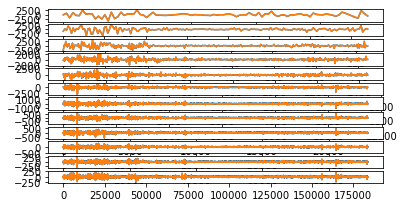

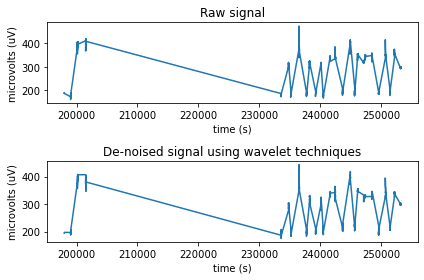

maximum level is 15


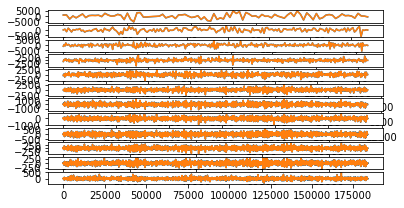

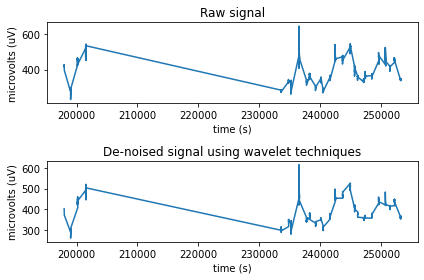

maximum level is 15


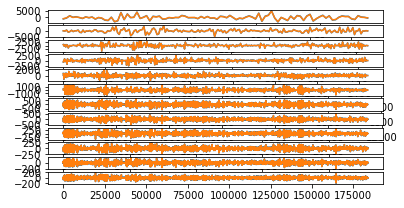

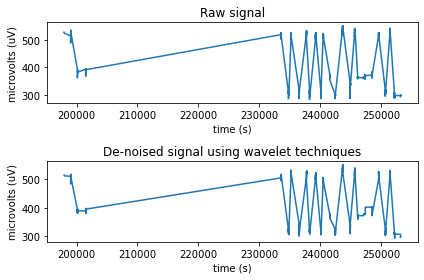

maximum level is 15


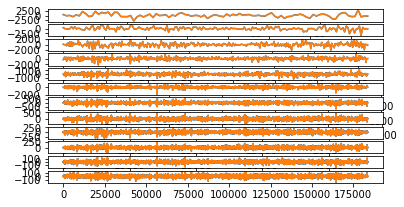

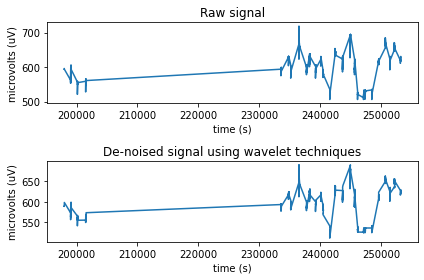

maximum level is 15


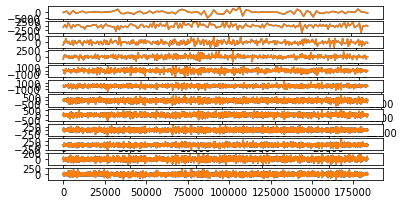

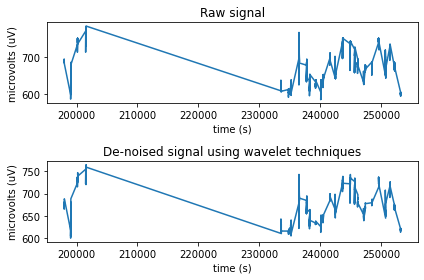

maximum level is 15


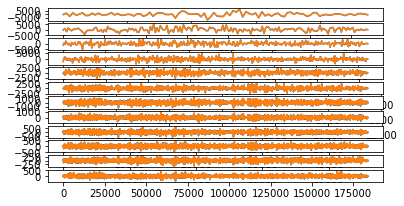

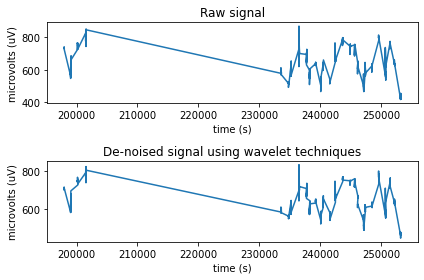

maximum level is 15


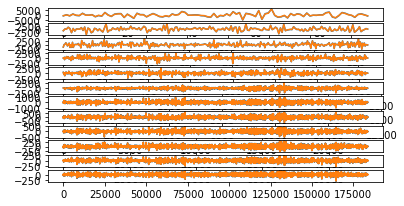

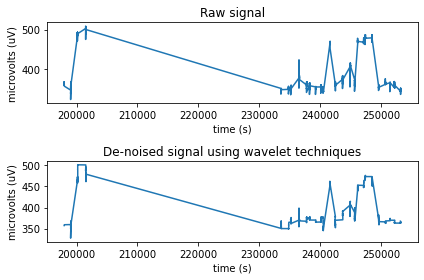

maximum level is 15


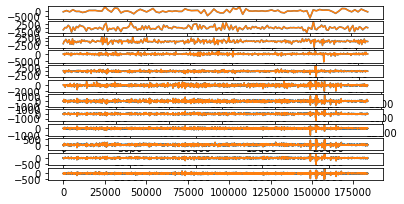

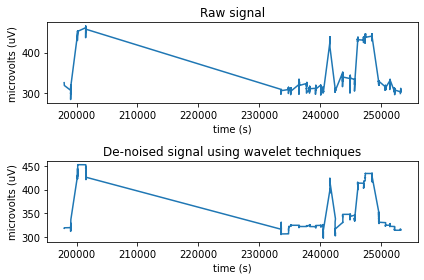

In [8]:
for a in range(8):
    dataolah = dataSensor.iloc[:,a]
    w = pywt.Wavelet('sym4')
    maxlev = pywt.dwt_max_level(len(dataolah), w.dec_len)
    print("maximum level is " + str(maxlev))
    threshold = 0.04

    coeffs = pywt.wavedec(dataolah, 'sym4', level=12)
    plt.figure()
    for i in range(1, len(coeffs)):
        plt.subplot(maxlev, 1, i)
        plt.plot(coeffs[i])
        coeffs[i] = pywt.threshold(coeffs[i], threshold*max(coeffs[i]))
        plt.plot(coeffs[i])
    datarec = pywt.waverec(coeffs, 'sym4')

    mintime = 1000
    maxtime = mintime + 2000

    index = dataolah.index

    plt.figure()
    plt.subplot(2, 1, 1)
    plt.plot(index[mintime:maxtime], dataolah[mintime:maxtime])
    plt.xlabel('time (s)')
    plt.ylabel('microvolts (uV)')
    plt.title("Raw signal")
    plt.subplot(2, 1, 2)
    plt.plot(index[mintime:maxtime], datarec[mintime:maxtime])
    plt.xlabel('time (s)')
    plt.ylabel('microvolts (uV)')
    plt.title("De-noised signal using wavelet techniques")

    plt.tight_layout()
    plt.show()
    lihat = pd.DataFrame(datarec)
    dataWavelet[a]=lihat

In [9]:
def correlation(dataset, threshold):
    col_corr = set()  
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]  
                col_corr.add(colname)
    return col_corr

In [10]:
dataWavelet

,0,1,2,3,4,5,6,7
0,390.109178,515.781323,375.397780,569.227310,800.664693,869.936380,458.302798,426.741599
1,390.157732,515.624750,375.844962,567.791845,799.444814,869.810445,458.507026,426.823973
2,390.195732,515.475601,376.213605,566.889933,797.519370,869.688519,458.677321,426.896267
3,390.149746,515.393555,376.150237,566.822416,797.484451,869.598844,458.649777,426.888822
4,390.069569,515.336182,375.886703,567.167886,797.964133,869.520879,458.532439,426.848918
...,...,...,...,...,...,...,...,...
367095,514.938152,329.868206,339.001898,342.683095,428.454325,685.960486,478.405005,490.274882
367096,515.166538,329.926066,336.987271,342.745398,428.592225,687.285701,478.587480,490.481273
367097,515.438447,329.932521,333.486536,342.831835,428.804317,689.680098,478.794723,490.707524
367098,515.716613,329.936423,330.142589,342.922146,429.028601,691.930333,479.005301,490.936366


In [11]:
data = dataWavelet.join(covidStatus2)
data

,0,1,2,3,4,5,6,7,sampling_id,covid_status
0,390.109178,515.781323,375.397780,569.227310,800.664693,869.936380,458.302798,426.741599,457.0,1.0
1,390.157732,515.624750,375.844962,567.791845,799.444814,869.810445,458.507026,426.823973,457.0,1.0
2,390.195732,515.475601,376.213605,566.889933,797.519370,869.688519,458.677321,426.896267,457.0,1.0
3,390.149746,515.393555,376.150237,566.822416,797.484451,869.598844,458.649777,426.888822,457.0,1.0
4,390.069569,515.336182,375.886703,567.167886,797.964133,869.520879,458.532439,426.848918,457.0,1.0
...,...,...,...,...,...,...,...,...,...,...
367095,514.938152,329.868206,339.001898,342.683095,428.454325,685.960486,478.405005,490.274882,11211.0,0.0
367096,515.166538,329.926066,336.987271,342.745398,428.592225,687.285701,478.587480,490.481273,11211.0,0.0
367097,515.438447,329.932521,333.486536,342.831835,428.804317,689.680098,478.794723,490.707524,11211.0,0.0
367098,515.716613,329.936423,330.142589,342.922146,429.028601,691.930333,479.005301,490.936366,11211.0,0.0


In [12]:
dataMean = data.groupby('sampling_id').agg(np.mean)
dataMean

,0,1,2,3,4,5,6,7,covid_status
sampling_id,,,,,,,,,
457.0,391.811120,511.176759,372.392556,570.564372,805.706117,868.255397,457.411719,429.147238,1.0
468.0,469.101792,445.483409,527.044728,586.702587,831.748006,824.295481,542.123380,496.043832,0.0
470.0,401.134826,382.895893,472.740969,566.917190,784.549747,771.381253,518.755444,480.509642,1.0
488.0,327.988727,326.461283,369.112173,535.493725,658.513084,576.780891,465.233949,437.767543,1.0
489.0,319.160616,312.565552,366.774607,528.834729,635.434800,565.137312,471.717193,434.375474,1.0
...,...,...,...,...,...,...,...,...,...
11207.0,453.902591,359.676122,333.961588,332.102249,382.101985,626.040137,429.871521,431.657404,0.0
11208.0,460.792014,328.331819,324.917773,309.534508,376.709489,625.597085,438.931087,443.093199,0.0
11209.0,468.720941,321.426916,325.187972,322.428351,390.364261,636.183988,442.226536,451.315698,0.0


In [13]:
x = dataMean.iloc[:,:8]
y = dataMean.iloc[:,8]

# scaler = StandardScaler()
# scaler.fit(x, y)

cv = KFold(n_splits=10, random_state=1, shuffle=True)
model =   RandomForestClassifier(n_estimators=64)

scores = cross_val_score(model, x, y, scoring='accuracy',
                         cv=cv, n_jobs=-1)

print("Cross-validation scores: ", scores)
print("Mean cross-validation score: ", scores.mean())

Cross-validation scores:  [0.77282378 0.78131635 0.77282378 0.78556263 0.75796178 0.73673036
 0.76220807 0.74522293 0.74468085 0.75106383]
Mean cross-validation score:  0.7610394362379727


In [14]:
x = dataMean.iloc[:,:8]
y = dataMean.iloc[:,8]

scaler = StandardScaler()
scaler.fit(x, y)

cv = KFold(n_splits=10, random_state=1, shuffle=True)
model =   RandomForestClassifier(n_estimators=64)

scores = cross_val_score(model, x, y, scoring='accuracy',
                         cv=cv, n_jobs=-1)

print("Cross-validation scores: ", scores)
print("Mean cross-validation score: ", scores.mean())

Cross-validation scores:  [0.77070064 0.77707006 0.76645435 0.79617834 0.74946921 0.74309979
 0.76857749 0.74097665 0.75319149 0.74255319]
Mean cross-validation score:  0.7608271220129195


In [15]:
data2 = data.drop(['covid_status'], axis = 1)
data2

,0,1,2,3,4,5,6,7,sampling_id
0,390.109178,515.781323,375.397780,569.227310,800.664693,869.936380,458.302798,426.741599,457.0
1,390.157732,515.624750,375.844962,567.791845,799.444814,869.810445,458.507026,426.823973,457.0
2,390.195732,515.475601,376.213605,566.889933,797.519370,869.688519,458.677321,426.896267,457.0
3,390.149746,515.393555,376.150237,566.822416,797.484451,869.598844,458.649777,426.888822,457.0
4,390.069569,515.336182,375.886703,567.167886,797.964133,869.520879,458.532439,426.848918,457.0
...,...,...,...,...,...,...,...,...,...
367095,514.938152,329.868206,339.001898,342.683095,428.454325,685.960486,478.405005,490.274882,11211.0
367096,515.166538,329.926066,336.987271,342.745398,428.592225,687.285701,478.587480,490.481273,11211.0
367097,515.438447,329.932521,333.486536,342.831835,428.804317,689.680098,478.794723,490.707524,11211.0
367098,515.716613,329.936423,330.142589,342.922146,429.028601,691.930333,479.005301,490.936366,11211.0


In [16]:
dataMean2 = data2.groupby('sampling_id').agg(np.mean)
dataMean2 = dataMean2.rename(columns={0:'mean_1',1:'mean_2', 2:'mean_3', 3:'mean_4', 4:'mean_5', 5:'mean_6', 6:'mean_7', 7:'mean_8'})
dataMin = data2.groupby('sampling_id').agg(np.min)
dataMin = dataMin.rename(columns={0:'min_1',1:'min_2', 2:'min_3', 3:'min_4', 4:'min_5', 5:'min_6', 6:'min_7', 7:'min_8'})
dataMax = data2.groupby('sampling_id').agg(np.max)
dataMax = dataMax.rename(columns={0:'max_1',1:'max_2', 2:'max_3', 3:'max_4', 4:'max_5', 5:'max_6', 6:'max_7', 7:'max_8'})
data_mean_min = dataMean2.join(dataMin)
data_mean_min_max = data_mean_min.join(dataMax)
data_mean_min_max

,mean_1,mean_2,mean_3,mean_4,mean_5,mean_6,mean_7,mean_8,min_1,min_2,...,min_7,min_8,max_1,max_2,max_3,max_4,max_5,max_6,max_7,max_8
sampling_id,,,,,,,,,,,,,,,,,,,,,
457.0,391.811120,511.176759,372.392556,570.564372,805.706117,868.255397,457.411719,429.147238,384.408905,499.289940,...,448.866198,421.950512,398.811675,518.679333,381.982821,576.299115,815.783450,878.560049,465.066489,440.130042
468.0,469.101792,445.483409,527.044728,586.702587,831.748006,824.295481,542.123380,496.043832,440.799592,435.425226,...,528.837897,482.463872,515.154746,460.064456,554.836474,594.431637,850.496594,842.641909,550.612691,505.600621
470.0,401.134826,382.895893,472.740969,566.917190,784.549747,771.381253,518.755444,480.509642,385.299110,359.228917,...,508.796423,466.325037,415.809629,406.455046,484.682267,578.057707,796.694170,789.386846,529.034984,488.483441
488.0,327.988727,326.461283,369.112173,535.493725,658.513084,576.780891,465.233949,437.767543,320.254164,317.963917,...,460.650882,432.794011,343.007085,339.655501,381.894446,539.713065,672.616410,604.336565,477.478067,450.595966
489.0,319.160616,312.565552,366.774607,528.834729,635.434800,565.137312,471.717193,434.375474,308.839901,293.160665,...,464.630948,431.048298,328.553010,318.365479,377.594691,534.818196,647.517265,583.407839,479.254052,438.820654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11207.0,453.902591,359.676122,333.961588,332.102249,382.101985,626.040137,429.871521,431.657404,423.859675,345.941268,...,403.850950,412.338839,471.074001,364.039292,342.208077,340.308158,400.585935,662.669168,436.093583,447.514445
11208.0,460.792014,328.331819,324.917773,309.534508,376.709489,625.597085,438.931087,443.093199,447.496039,319.526213,...,426.228827,430.412768,473.394925,337.215940,342.893083,320.323163,392.357828,635.165503,446.144860,455.701164
11209.0,468.720941,321.426916,325.187972,322.428351,390.364261,636.183988,442.226536,451.315698,439.927188,312.347390,...,415.610054,427.879336,474.496698,329.984435,333.525170,330.596771,404.632486,652.115597,448.071966,456.456232


In [17]:
x = data_mean_min_max
y = dataMean.iloc[:,8]

# scaler = StandardScaler()
# scaler.fit(x, y)

cv = KFold(n_splits=10, random_state=1, shuffle=True)
model =   RandomForestClassifier(n_estimators=64)

scores = cross_val_score(model, x, y, scoring='accuracy',
                         cv=cv, n_jobs=-1)

print("Cross-validation scores: ", scores)
print("Mean cross-validation score: ", scores.mean())

Cross-validation scores:  [0.77070064 0.78556263 0.78768577 0.80254777 0.76645435 0.75583864
 0.76433121 0.74309979 0.76170213 0.74893617]
Mean cross-validation score:  0.7686859104666397


In [18]:
x = data_mean_min_max
y = dataMean.iloc[:,8]

scaler = StandardScaler()
scaler.fit(x, y)

cv = KFold(n_splits=10, random_state=1, shuffle=True)
model =   RandomForestClassifier(n_estimators=64)

scores = cross_val_score(model, x, y, scoring='accuracy',
                         cv=cv, n_jobs=-1)

print("Cross-validation scores: ", scores)
print("Mean cross-validation score: ", scores.mean())

Cross-validation scores:  [0.79617834 0.77919321 0.77494692 0.79830149 0.75159236 0.7537155
 0.77919321 0.7537155  0.75531915 0.76170213]
Mean cross-validation score:  0.7703857794642455


In [19]:
corr_features = correlation(x, 0.9)
print(len(set(corr_features)))
print(corr_features)

13
{'min_4', 'min_3', 'max_3', 'max_6', 'max_7', 'min_8', 'max_4', 'max_1', 'min_1', 'max_5', 'max_2', 'max_8', 'min_7'}


In [20]:
pearson_mean_min_max = data_mean_min_max[['min_7', 'max_6', 'max_1', 'max_5', 'max_7', 'min_4', 'max_8', 'min_1', 'min_3', 'min_8', 'max_2', 'max_3', 'max_4']]
pearson_mean_min_max

,min_7,max_6,max_1,max_5,max_7,min_4,max_8,min_1,min_3,min_8,max_2,max_3,max_4
sampling_id,,,,,,,,,,,,,
457.0,448.866198,878.560049,398.811675,815.783450,465.066489,566.822416,440.130042,384.408905,364.278086,421.950512,518.679333,381.982821,576.299115
468.0,528.837897,842.641909,515.154746,850.496594,550.612691,579.189098,505.600621,440.799592,504.811095,482.463872,460.064456,554.836474,594.431637
470.0,508.796423,789.386846,415.809629,796.694170,529.034984,557.724688,488.483441,385.299110,462.139104,466.325037,406.455046,484.682267,578.057707
488.0,460.650882,604.336565,343.007085,672.616410,477.478067,528.749131,450.595966,320.254164,362.981462,432.794011,339.655501,381.894446,539.713065
489.0,464.630948,583.407839,328.553010,647.517265,479.254052,517.149878,438.820654,308.839901,362.956717,431.048298,318.365479,377.594691,534.818196
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11207.0,403.850950,662.669168,471.074001,400.585935,436.093583,317.557322,447.514445,423.859675,307.646260,412.338839,364.039292,342.208077,340.308158
11208.0,426.228827,635.165503,473.394925,392.357828,446.144860,299.991807,455.701164,447.496039,304.330745,430.412768,337.215940,342.893083,320.323163
11209.0,415.610054,652.115597,474.496698,404.632486,448.071966,310.037160,456.456232,439.927188,299.276813,427.879336,329.984435,333.525170,330.596771


In [21]:
x = pearson_mean_min_max
y = dataMean.iloc[:,8]

scaler = StandardScaler()
scaler.fit(x, y)

cv = KFold(n_splits=10, random_state=1, shuffle=True)
model =   RandomForestClassifier(n_estimators=64)

scores = cross_val_score(model, x, y, scoring='accuracy',
                         cv=cv, n_jobs=-1)

print("Cross-validation scores: ", scores)
print("Mean cross-validation score: ", scores.mean())

Cross-validation scores:  [0.76433121 0.77070064 0.77919321 0.78768577 0.76008493 0.77070064
 0.77919321 0.75796178 0.76382979 0.74468085]
Mean cross-validation score:  0.7678362018340336


<AxesSubplot:>

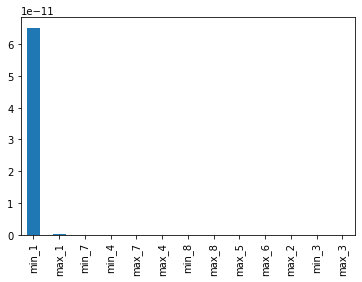

In [22]:
chi_scores = chi2(x,y)
p_values = pd.Series(chi_scores[1],index = x.columns)
p_values.sort_values(ascending = False , inplace = True)

p_values.plot.bar()

In [23]:
corr_features = correlation(x, 0.9)
print(len(set(corr_features)))
print(corr_features)

4
{'max_7', 'min_1', 'max_3', 'min_8'}


In [24]:
pearson_mean_min_max2 = x[['max_3', 'min_8', 'min_1', 'max_7']]
pearson_mean_min_max2

,max_3,min_8,min_1,max_7
sampling_id,,,,
457.0,381.982821,421.950512,384.408905,465.066489
468.0,554.836474,482.463872,440.799592,550.612691
470.0,484.682267,466.325037,385.299110,529.034984
488.0,381.894446,432.794011,320.254164,477.478067
489.0,377.594691,431.048298,308.839901,479.254052
...,...,...,...,...
11207.0,342.208077,412.338839,423.859675,436.093583
11208.0,342.893083,430.412768,447.496039,446.144860
11209.0,333.525170,427.879336,439.927188,448.071966


In [25]:
x = pearson_mean_min_max2
y = dataMean.iloc[:,8]

scaler = StandardScaler()
scaler.fit(x, y)

cv = KFold(n_splits=10, random_state=1, shuffle=True)
model =   RandomForestClassifier(n_estimators=64)

scores = cross_val_score(model, x, y, scoring='accuracy',
                         cv=cv, n_jobs=-1)

print("Cross-validation scores: ", scores)
print("Mean cross-validation score: ", scores.mean())

Cross-validation scores:  [0.75796178 0.74522293 0.75159236 0.74946921 0.72186837 0.71549894
 0.75796178 0.73460722 0.73191489 0.72340426]
Mean cross-validation score:  0.7389501739169716


In [26]:
dataStd = data2.groupby('sampling_id').agg(np.std)
dataStd = dataStd.rename(columns={0:'std_1', 1:'std_2', 2:'std_3', 3:'std_4', 4:'std_5', 5:'std_6', 6:'std_7', 7:'std_8'})
data_mean_min_max_std = data_mean_min_max.join(dataStd)
data_mean_min_max_std

,mean_1,mean_2,mean_3,mean_4,mean_5,mean_6,mean_7,mean_8,min_1,min_2,...,max_7,max_8,std_1,std_2,std_3,std_4,std_5,std_6,std_7,std_8
sampling_id,,,,,,,,,,,,,,,,,,,,,
457.0,391.811120,511.176759,372.392556,570.564372,805.706117,868.255397,457.411719,429.147238,384.408905,499.289940,...,465.066489,440.130042,3.443938,4.444104,3.976928,2.360992,4.762844,3.990651,3.475668,3.667814
468.0,469.101792,445.483409,527.044728,586.702587,831.748006,824.295481,542.123380,496.043832,440.799592,435.425226,...,550.612691,505.600621,18.459397,6.971328,13.050162,4.534229,8.856207,8.987656,6.549619,6.603397
470.0,401.134826,382.895893,472.740969,566.917190,784.549747,771.381253,518.755444,480.509642,385.299110,359.228917,...,529.034984,488.483441,7.657581,8.380566,6.817837,4.987862,5.848724,7.862736,5.747136,4.411044
488.0,327.988727,326.461283,369.112173,535.493725,658.513084,576.780891,465.233949,437.767543,320.254164,317.963917,...,477.478067,450.595966,6.107029,5.188205,5.219494,2.417358,6.526989,13.858697,3.687073,4.447546
489.0,319.160616,312.565552,366.774607,528.834729,635.434800,565.137312,471.717193,434.375474,308.839901,293.160665,...,479.254052,438.820654,3.256428,4.576832,3.922308,3.444722,8.145608,14.635578,2.415812,2.533895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11207.0,453.902591,359.676122,333.961588,332.102249,382.101985,626.040137,429.871521,431.657404,423.859675,345.941268,...,436.093583,447.514445,7.231802,3.847107,4.149786,5.434538,8.528474,15.130405,4.308139,7.600801
11208.0,460.792014,328.331819,324.917773,309.534508,376.709489,625.597085,438.931087,443.093199,447.496039,319.526213,...,446.144860,455.701164,5.465721,4.967230,7.826244,5.456197,7.701381,5.434011,2.863315,8.976857
11209.0,468.720941,321.426916,325.187972,322.428351,390.364261,636.183988,442.226536,451.315698,439.927188,312.347390,...,448.071966,456.456232,5.531669,3.956858,4.465075,4.725026,10.237943,14.674021,4.594327,4.772392


In [27]:
x = data_mean_min_max_std
y = dataMean.iloc[:,8]

# scaler = StandardScaler()
# scaler.fit(x, y)

cv = KFold(n_splits=10, random_state=1, shuffle=True)
model =   RandomForestClassifier(n_estimators=64)

scores = cross_val_score(model, x, y, scoring='accuracy',
                         cv=cv, n_jobs=-1)

print("Cross-validation scores: ", scores)
print("Mean cross-validation score: ", scores.mean())

Cross-validation scores:  [0.76645435 0.77707006 0.78343949 0.78980892 0.75159236 0.76008493
 0.77070064 0.7388535  0.76170213 0.74255319]
Mean cross-validation score:  0.7642259565433436


In [28]:
x = data_mean_min_max_std
y = dataMean.iloc[:,8]

scaler = StandardScaler()
scaler.fit(x, y)

cv = KFold(n_splits=10, random_state=1, shuffle=True)
model =   RandomForestClassifier(n_estimators=64)

scores = cross_val_score(model, x, y, scoring='accuracy',
                         cv=cv, n_jobs=-1)

print("Cross-validation scores: ", scores)
print("Mean cross-validation score: ", scores.mean())

Cross-validation scores:  [0.77707006 0.76857749 0.78556263 0.80042463 0.76645435 0.74309979
 0.77070064 0.76220807 0.75744681 0.74680851]
Mean cross-validation score:  0.7678352983692461


<AxesSubplot:>

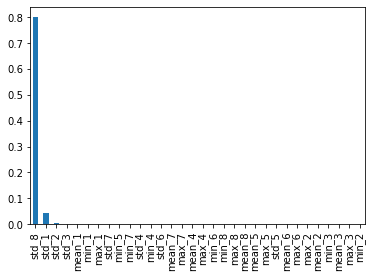

In [29]:
chi_scores = chi2(x,y)
p_values = pd.Series(chi_scores[1],index = x.columns)
p_values.sort_values(ascending = False , inplace = True)

p_values.plot.bar()

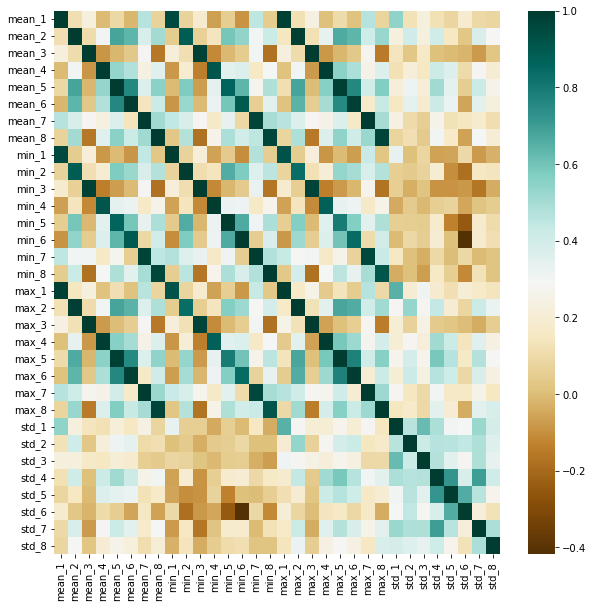

In [30]:
plt.figure(figsize=(10,10))
c = x.corr(method='pearson')
ax = sns.heatmap(c, cmap='BrBG')

In [31]:
corr_features = correlation(x, 0.9)
print(len(set(corr_features)))
print(corr_features)

13
{'min_4', 'min_3', 'max_3', 'max_6', 'max_7', 'min_8', 'max_4', 'max_1', 'min_1', 'max_5', 'max_2', 'max_8', 'min_7'}


In [32]:
pearson_std = x[['min_7', 'max_6', 'max_1', 'max_5', 'max_7', 'min_4', 'max_8', 'min_1', 'min_3', 'min_8', 'max_2', 'max_3', 'max_4']]
pearson_std

,min_7,max_6,max_1,max_5,max_7,min_4,max_8,min_1,min_3,min_8,max_2,max_3,max_4
sampling_id,,,,,,,,,,,,,
457.0,448.866198,878.560049,398.811675,815.783450,465.066489,566.822416,440.130042,384.408905,364.278086,421.950512,518.679333,381.982821,576.299115
468.0,528.837897,842.641909,515.154746,850.496594,550.612691,579.189098,505.600621,440.799592,504.811095,482.463872,460.064456,554.836474,594.431637
470.0,508.796423,789.386846,415.809629,796.694170,529.034984,557.724688,488.483441,385.299110,462.139104,466.325037,406.455046,484.682267,578.057707
488.0,460.650882,604.336565,343.007085,672.616410,477.478067,528.749131,450.595966,320.254164,362.981462,432.794011,339.655501,381.894446,539.713065
489.0,464.630948,583.407839,328.553010,647.517265,479.254052,517.149878,438.820654,308.839901,362.956717,431.048298,318.365479,377.594691,534.818196
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11207.0,403.850950,662.669168,471.074001,400.585935,436.093583,317.557322,447.514445,423.859675,307.646260,412.338839,364.039292,342.208077,340.308158
11208.0,426.228827,635.165503,473.394925,392.357828,446.144860,299.991807,455.701164,447.496039,304.330745,430.412768,337.215940,342.893083,320.323163
11209.0,415.610054,652.115597,474.496698,404.632486,448.071966,310.037160,456.456232,439.927188,299.276813,427.879336,329.984435,333.525170,330.596771


In [33]:
x = pearson_std
y = dataMean.iloc[:,8]

scaler = StandardScaler()
scaler.fit(x, y)

cv = KFold(n_splits=10, random_state=1, shuffle=True)
model =   RandomForestClassifier(n_estimators=64)

scores = cross_val_score(model, x, y, scoring='accuracy',
                         cv=cv, n_jobs=-1)

print("Cross-validation scores: ", scores)
print("Mean cross-validation score: ", scores.mean())

Cross-validation scores:  [0.76645435 0.78131635 0.76220807 0.80042463 0.76857749 0.76433121
 0.77070064 0.74734607 0.76595745 0.75319149]
Mean cross-validation score:  0.7680507747210552


In [34]:
sampling = 0
datakurtosis = pd.DataFrame([])
for samp in data2.sampling_id:
    dataaa = pd.DataFrame([])
    if samp == sampling:
        continue
    else:
        print(samp)
        newdataKurto = data2.groupby('sampling_id')
        data1 = newdataKurto.get_group(samp)
        for j in range(8):
            data=[]
            data.append(data1.iloc[:,j].kurtosis())
            dataaa[j]=data
        sampling = samp
    datakurtosis = pd.concat([datakurtosis, dataaa], ignore_index = False)

457.0
468.0
470.0
488.0
489.0
490.0
492.0
493.0
494.0
495.0
496.0
497.0
498.0
499.0
500.0
501.0
536.0
537.0
538.0
539.0
540.0
541.0
542.0
543.0
544.0
545.0
546.0
547.0
548.0
549.0
550.0
551.0
552.0
553.0
554.0
555.0
556.0
557.0
558.0
559.0
560.0
567.0
568.0
569.0
570.0
571.0
572.0
573.0
574.0
575.0
576.0
577.0
578.0
579.0
580.0
581.0
582.0
583.0
584.0
585.0
586.0
587.0
588.0
589.0
590.0
591.0
596.0
597.0
598.0
599.0
600.0
601.0
602.0
603.0
604.0
605.0
607.0
616.0
617.0
618.0
619.0
620.0
621.0
622.0
623.0
624.0
625.0
626.0
627.0
628.0
629.0
630.0
631.0
632.0
634.0
635.0
636.0
637.0
638.0
639.0
640.0
641.0
642.0
643.0
652.0
653.0
654.0
655.0
656.0
657.0
658.0
659.0
660.0
661.0
662.0
663.0
664.0
665.0
666.0
667.0
668.0
669.0
670.0
671.0
672.0
673.0
674.0
675.0
679.0
680.0
681.0
689.0
690.0
691.0
692.0
693.0
694.0
695.0
696.0
697.0
698.0
699.0
700.0
701.0
702.0
703.0
704.0
705.0
706.0
707.0
708.0
709.0
710.0
711.0
712.0
713.0
714.0
715.0
716.0
717.0
718.0
719.0
720.0
721.0
722.0
723.0
724.

4210.0
4218.0
4220.0
4222.0
4224.0
4226.0
4230.0
4234.0
4253.0
4254.0
4255.0
4256.0
4257.0
4258.0
4259.0
4260.0
4263.0
4264.0
4265.0
4266.0
4267.0
4268.0
4269.0
4270.0
4271.0
4272.0
4273.0
4274.0
4275.0
4277.0
4278.0
4279.0
4280.0
4281.0
4282.0
4283.0
4284.0
4285.0
4287.0
4288.0
4295.0
4296.0
4300.0
4301.0
4302.0
4304.0
4306.0
4308.0
4309.0
4311.0
4323.0
4324.0
4325.0
4326.0
4327.0
4328.0
4329.0
4330.0
4331.0
4332.0
4333.0
4334.0
4335.0
4336.0
4344.0
4345.0
4346.0
4347.0
4348.0
4349.0
4350.0
4351.0
4352.0
4353.0
4354.0
4366.0
4367.0
4368.0
4369.0
4371.0
4372.0
4374.0
4376.0
4378.0
4380.0
4388.0
4389.0
4390.0
4391.0
4392.0
4393.0
4394.0
4396.0
4399.0
4400.0
4402.0
4404.0
4408.0
4410.0
4414.0
4416.0
4419.0
4425.0
4432.0
4433.0
4434.0
4435.0
4436.0
4437.0
4438.0
4463.0
4464.0
4465.0
4466.0
4473.0
4475.0
4478.0
4479.0
4480.0
4483.0
4558.0
4559.0
4560.0
4561.0
4562.0
4563.0
4564.0
4565.0
4566.0
4569.0
4572.0
4576.0
4578.0
4580.0
4582.0
4586.0
4588.0
4590.0
4591.0
4593.0
4602.0
4605.0
4606.0

6317.0
6318.0
6319.0
6320.0
6321.0
6322.0
6323.0
6324.0
6325.0
6326.0
6327.0
6329.0
6394.0
6398.0
6400.0
6405.0
6408.0
6414.0
6415.0
6416.0
6417.0
6418.0
6419.0
6420.0
6421.0
6422.0
6423.0
6424.0
6426.0
6427.0
6428.0
6429.0
6430.0
6444.0
6445.0
6447.0
6451.0
6452.0
6453.0
6454.0
6455.0
6457.0
6458.0
6459.0
6460.0
6461.0
6466.0
6468.0
6469.0
6471.0
6472.0
6473.0
6475.0
6476.0
6477.0
6478.0
6479.0
6480.0
6481.0
6482.0
6483.0
6484.0
6485.0
6486.0
6487.0
6488.0
6489.0
6490.0
6492.0
6493.0
6494.0
6495.0
6497.0
6498.0
6499.0
6500.0
6501.0
6502.0
6503.0
6504.0
6505.0
6506.0
6507.0
6533.0
6534.0
6535.0
6536.0
6537.0
6538.0
6539.0
6540.0
6542.0
6543.0
6544.0
6545.0
6546.0
6566.0
6567.0
6568.0
6569.0
6570.0
6571.0
6572.0
6573.0
6574.0
6575.0
6576.0
6577.0
6578.0
6579.0
6580.0
6581.0
6582.0
6583.0
6584.0
6585.0
6587.0
6589.0
6626.0
6628.0
6629.0
6630.0
6631.0
6632.0
6633.0
6634.0
6635.0
6636.0
6637.0
6638.0
6639.0
6640.0
6641.0
6642.0
6643.0
6645.0
6647.0
6648.0
6649.0
6650.0
6651.0
6652.0
6653.0

8363.0
8366.0
8367.0
8368.0
8375.0
8376.0
8377.0
8378.0
8379.0
8380.0
8381.0
8382.0
8385.0
8386.0
8387.0
8388.0
8393.0
8395.0
8396.0
8399.0
8400.0
8401.0
8404.0
8405.0
8408.0
8409.0
8410.0
8411.0
8412.0
8413.0
8414.0
8415.0
8417.0
8418.0
8419.0
8420.0
8421.0
8422.0
8424.0
8425.0
8426.0
8428.0
8430.0
8432.0
8434.0
8435.0
8436.0
8438.0
8440.0
8442.0
8443.0
8444.0
8446.0
8447.0
8448.0
8449.0
8450.0
8451.0
8452.0
8453.0
8454.0
8455.0
8456.0
8457.0
8458.0
8460.0
8461.0
8462.0
8463.0
8464.0
8465.0
8466.0
8467.0
8468.0
8469.0
8470.0
8478.0
8488.0
8489.0
8494.0
8497.0
8498.0
8501.0
8504.0
8505.0
8506.0
8511.0
8512.0
8513.0
8518.0
8523.0
8524.0
8526.0
8527.0
8528.0
8529.0
8530.0
8531.0
8533.0
8534.0
8536.0
8537.0
8539.0
8540.0
8541.0
8542.0
8543.0
8545.0
8546.0
8547.0
8548.0
8549.0
8550.0
8551.0
8552.0
8554.0
8555.0
8556.0
8557.0
8558.0
8559.0
8560.0
8561.0
8562.0
8563.0
8564.0
8565.0
8569.0
8570.0
8589.0
8590.0
8591.0
8592.0
8593.0
8594.0
8597.0
8598.0
8599.0
8600.0
8601.0
8602.0
8603.0
8604.0

11158.0
11159.0
11160.0
11161.0
11162.0
11163.0
11164.0
11165.0
11166.0
11167.0
11168.0
11169.0
11170.0
11171.0
11172.0
11173.0
11174.0
11175.0
11176.0
11177.0
11178.0
11180.0
11181.0
11182.0
11183.0
11184.0
11185.0
11189.0
11190.0
11191.0
11192.0
11193.0
11194.0
11195.0
11196.0
11207.0
11208.0
11209.0
11210.0
11211.0
nan


KeyError: nan

In [35]:
datakurtosis = datakurtosis.rename(columns={0:'kurto_1', 1:'kurto_2', 2:'kurto_3', 3:'kurto_4', 4:'kurto_4', 5:'kurto_6', 6:'kurto_7', 7:'kurto_8'})
datakurtosis.reset_index(inplace=True)
datakurtosis2 = datakurtosis.drop(['index'], axis=1)
datakurtosis2

,kurto_1,kurto_2,kurto_3,kurto_4,kurto_4,kurto_6,kurto_7,kurto_8
0,-0.475477,-1.063353,-0.109006,-0.209763,-1.072606,0.145090,0.679229,-0.100783
1,-0.243793,-0.730032,-0.742141,-1.236952,-0.998850,0.599490,-1.011331,-1.106044
2,-0.857822,0.090649,-1.151135,-0.758309,-0.073692,0.853296,-1.099281,0.002499
3,-1.067892,-0.646509,-1.084602,0.991273,-0.093114,-1.063476,0.745019,-0.591120
4,0.923905,6.142641,-0.042934,1.469695,5.538247,5.441038,0.788319,-1.275922
...,...,...,...,...,...,...,...,...
4703,2.252727,3.238856,14.538785,-0.535269,2.477699,-1.040431,11.266669,0.391178
4704,-1.196845,-1.141265,0.361359,-1.286393,-1.093636,-0.789965,3.387231,-1.559876
4705,9.833162,-0.511888,13.447490,-0.558803,1.393383,-0.039273,13.745154,7.318565
4706,2.377130,1.422351,5.805679,4.728853,1.030313,-1.116595,1.438356,1.680843


In [36]:
x = datakurtosis2
y = dataMean.iloc[:,8]

scaler = StandardScaler()
scaler.fit(x, y)

cv = KFold(n_splits=10, random_state=1, shuffle=True)
model =   RandomForestClassifier(n_estimators=64)

scores = cross_val_score(model, x, y, scoring='accuracy',
                         cv=cv, n_jobs=-1)

print("Cross-validation scores: ", scores)
print("Mean cross-validation score: ", scores.mean())

Cross-validation scores:  [0.69002123 0.67940552 0.69214437 0.67091295 0.67515924 0.66242038
 0.70912951 0.69426752 0.69574468 0.65106383]
Mean cross-validation score:  0.6820269232506663


In [37]:
sampling = 0
dataskew = pd.DataFrame([])
for samp in data2.sampling_id:
    dataaa = pd.DataFrame([])
    if samp == sampling:
        continue
    else:
        print(samp)
        newdataskew = data2.groupby('sampling_id')
        data1 = newdataskew.get_group(samp)
        for j in range(8):
            data=[]
            data.append(data1.iloc[:,j].skew())
            dataaa[j]=data
        sampling = samp
    dataskew = pd.concat([dataskew, dataaa], ignore_index = False)

457.0
468.0
470.0
488.0
489.0
490.0
492.0
493.0
494.0
495.0
496.0
497.0
498.0
499.0
500.0
501.0
536.0
537.0
538.0
539.0
540.0
541.0
542.0
543.0
544.0
545.0
546.0
547.0
548.0
549.0
550.0
551.0
552.0
553.0
554.0
555.0
556.0
557.0
558.0
559.0
560.0
567.0
568.0
569.0
570.0
571.0
572.0
573.0
574.0
575.0
576.0
577.0
578.0
579.0
580.0
581.0
582.0
583.0
584.0
585.0
586.0
587.0
588.0
589.0
590.0
591.0
596.0
597.0
598.0
599.0
600.0
601.0
602.0
603.0
604.0
605.0
607.0
616.0
617.0
618.0
619.0
620.0
621.0
622.0
623.0
624.0
625.0
626.0
627.0
628.0
629.0
630.0
631.0
632.0
634.0
635.0
636.0
637.0
638.0
639.0
640.0
641.0
642.0
643.0
652.0
653.0
654.0
655.0
656.0
657.0
658.0
659.0
660.0
661.0
662.0
663.0
664.0
665.0
666.0
667.0
668.0
669.0
670.0
671.0
672.0
673.0
674.0
675.0
679.0
680.0
681.0
689.0
690.0
691.0
692.0
693.0
694.0
695.0
696.0
697.0
698.0
699.0
700.0
701.0
702.0
703.0
704.0
705.0
706.0
707.0
708.0
709.0
710.0
711.0
712.0
713.0
714.0
715.0
716.0
717.0
718.0
719.0
720.0
721.0
722.0
723.0
724.

4220.0
4222.0
4224.0
4226.0
4230.0
4234.0
4253.0
4254.0
4255.0
4256.0
4257.0
4258.0
4259.0
4260.0
4263.0
4264.0
4265.0
4266.0
4267.0
4268.0
4269.0
4270.0
4271.0
4272.0
4273.0
4274.0
4275.0
4277.0
4278.0
4279.0
4280.0
4281.0
4282.0
4283.0
4284.0
4285.0
4287.0
4288.0
4295.0
4296.0
4300.0
4301.0
4302.0
4304.0
4306.0
4308.0
4309.0
4311.0
4323.0
4324.0
4325.0
4326.0
4327.0
4328.0
4329.0
4330.0
4331.0
4332.0
4333.0
4334.0
4335.0
4336.0
4344.0
4345.0
4346.0
4347.0
4348.0
4349.0
4350.0
4351.0
4352.0
4353.0
4354.0
4366.0
4367.0
4368.0
4369.0
4371.0
4372.0
4374.0
4376.0
4378.0
4380.0
4388.0
4389.0
4390.0
4391.0
4392.0
4393.0
4394.0
4396.0
4399.0
4400.0
4402.0
4404.0
4408.0
4410.0
4414.0
4416.0
4419.0
4425.0
4432.0
4433.0
4434.0
4435.0
4436.0
4437.0
4438.0
4463.0
4464.0
4465.0
4466.0
4473.0
4475.0
4478.0
4479.0
4480.0
4483.0
4558.0
4559.0
4560.0
4561.0
4562.0
4563.0
4564.0
4565.0
4566.0
4569.0
4572.0
4576.0
4578.0
4580.0
4582.0
4586.0
4588.0
4590.0
4591.0
4593.0
4602.0
4605.0
4606.0
4607.0
4608.0

6319.0
6320.0
6321.0
6322.0
6323.0
6324.0
6325.0
6326.0
6327.0
6329.0
6394.0
6398.0
6400.0
6405.0
6408.0
6414.0
6415.0
6416.0
6417.0
6418.0
6419.0
6420.0
6421.0
6422.0
6423.0
6424.0
6426.0
6427.0
6428.0
6429.0
6430.0
6444.0
6445.0
6447.0
6451.0
6452.0
6453.0
6454.0
6455.0
6457.0
6458.0
6459.0
6460.0
6461.0
6466.0
6468.0
6469.0
6471.0
6472.0
6473.0
6475.0
6476.0
6477.0
6478.0
6479.0
6480.0
6481.0
6482.0
6483.0
6484.0
6485.0
6486.0
6487.0
6488.0
6489.0
6490.0
6492.0
6493.0
6494.0
6495.0
6497.0
6498.0
6499.0
6500.0
6501.0
6502.0
6503.0
6504.0
6505.0
6506.0
6507.0
6533.0
6534.0
6535.0
6536.0
6537.0
6538.0
6539.0
6540.0
6542.0
6543.0
6544.0
6545.0
6546.0
6566.0
6567.0
6568.0
6569.0
6570.0
6571.0
6572.0
6573.0
6574.0
6575.0
6576.0
6577.0
6578.0
6579.0
6580.0
6581.0
6582.0
6583.0
6584.0
6585.0
6587.0
6589.0
6626.0
6628.0
6629.0
6630.0
6631.0
6632.0
6633.0
6634.0
6635.0
6636.0
6637.0
6638.0
6639.0
6640.0
6641.0
6642.0
6643.0
6645.0
6647.0
6648.0
6649.0
6650.0
6651.0
6652.0
6653.0
6654.0
6655.0

8367.0
8368.0
8375.0
8376.0
8377.0
8378.0
8379.0
8380.0
8381.0
8382.0
8385.0
8386.0
8387.0
8388.0
8393.0
8395.0
8396.0
8399.0
8400.0
8401.0
8404.0
8405.0
8408.0
8409.0
8410.0
8411.0
8412.0
8413.0
8414.0
8415.0
8417.0
8418.0
8419.0
8420.0
8421.0
8422.0
8424.0
8425.0
8426.0
8428.0
8430.0
8432.0
8434.0
8435.0
8436.0
8438.0
8440.0
8442.0
8443.0
8444.0
8446.0
8447.0
8448.0
8449.0
8450.0
8451.0
8452.0
8453.0
8454.0
8455.0
8456.0
8457.0
8458.0
8460.0
8461.0
8462.0
8463.0
8464.0
8465.0
8466.0
8467.0
8468.0
8469.0
8470.0
8478.0
8488.0
8489.0
8494.0
8497.0
8498.0
8501.0
8504.0
8505.0
8506.0
8511.0
8512.0
8513.0
8518.0
8523.0
8524.0
8526.0
8527.0
8528.0
8529.0
8530.0
8531.0
8533.0
8534.0
8536.0
8537.0
8539.0
8540.0
8541.0
8542.0
8543.0
8545.0
8546.0
8547.0
8548.0
8549.0
8550.0
8551.0
8552.0
8554.0
8555.0
8556.0
8557.0
8558.0
8559.0
8560.0
8561.0
8562.0
8563.0
8564.0
8565.0
8569.0
8570.0
8589.0
8590.0
8591.0
8592.0
8593.0
8594.0
8597.0
8598.0
8599.0
8600.0
8601.0
8602.0
8603.0
8604.0
8605.0
8606.0

11162.0
11163.0
11164.0
11165.0
11166.0
11167.0
11168.0
11169.0
11170.0
11171.0
11172.0
11173.0
11174.0
11175.0
11176.0
11177.0
11178.0
11180.0
11181.0
11182.0
11183.0
11184.0
11185.0
11189.0
11190.0
11191.0
11192.0
11193.0
11194.0
11195.0
11196.0
11207.0
11208.0
11209.0
11210.0
11211.0
nan


KeyError: nan

In [40]:
dataskew = dataskew.rename(columns={0:'skew_1', 1:'skew_2', 2:'skew_3', 3:'skew_4', 4:'skew_5', 5:'skew_6', 6:'skew_7', 7:'skew_8'})
dataskew.reset_index(inplace=True)
dataskew2 = dataskew.drop(['index', 'level_0'], axis=1)
dataskew2

,skew_1,skew_2,skew_3,skew_4,skew_5,skew_6,skew_7,skew_8
0,0.199908,-0.230562,0.231987,0.595935,-0.228721,0.788068,-0.418176,0.462138
1,0.638422,0.699081,0.316177,0.423406,0.504138,-0.821074,-0.331850,-0.143874
2,0.393488,-0.212890,0.343633,0.078139,-0.182991,-1.102886,0.402941,-0.003807
3,0.385439,0.283943,0.482539,-1.010797,0.145950,0.420860,0.948793,0.565563
4,-0.204721,-1.907889,0.989361,-0.733552,-2.043111,-2.158363,0.185246,0.325876
...,...,...,...,...,...,...,...,...
4703,-0.144117,-1.736568,-2.126673,-0.415372,-1.187696,0.272413,-2.313264,0.353441
4704,0.043601,-0.111356,0.433441,0.292649,0.349017,-0.163674,-1.089747,-0.031530
4705,-2.741427,0.590162,-2.548111,0.463829,-1.128225,-1.102692,-3.346722,-2.440175
4706,-1.018022,1.102710,-1.361287,-1.568907,-1.201234,-0.302259,-0.182617,-0.678904


In [41]:
x = dataskew2
y = dataMean.iloc[:,8]

scaler = StandardScaler()
scaler.fit(x, y)

cv = KFold(n_splits=10, random_state=1, shuffle=True)
model =   RandomForestClassifier(n_estimators=64)

scores = cross_val_score(model, x, y, scoring='accuracy',
                         cv=cv, n_jobs=-1)

print("Cross-validation scores: ", scores)
print("Mean cross-validation score: ", scores.mean())

Cross-validation scores:  [0.67728238 0.67940552 0.65605096 0.69002123 0.67728238 0.65180467
 0.71125265 0.69002123 0.65957447 0.65319149]
Mean cross-validation score:  0.6745886976555089


In [42]:
data_kurto_skew = datakurtosis2.join(dataskew2)
data_kurto_skew

,kurto_1,kurto_2,kurto_3,kurto_4,kurto_4,kurto_6,kurto_7,kurto_8,skew_1,skew_2,skew_3,skew_4,skew_5,skew_6,skew_7,skew_8
0,-0.475477,-1.063353,-0.109006,-0.209763,-1.072606,0.145090,0.679229,-0.100783,0.199908,-0.230562,0.231987,0.595935,-0.228721,0.788068,-0.418176,0.462138
1,-0.243793,-0.730032,-0.742141,-1.236952,-0.998850,0.599490,-1.011331,-1.106044,0.638422,0.699081,0.316177,0.423406,0.504138,-0.821074,-0.331850,-0.143874
2,-0.857822,0.090649,-1.151135,-0.758309,-0.073692,0.853296,-1.099281,0.002499,0.393488,-0.212890,0.343633,0.078139,-0.182991,-1.102886,0.402941,-0.003807
3,-1.067892,-0.646509,-1.084602,0.991273,-0.093114,-1.063476,0.745019,-0.591120,0.385439,0.283943,0.482539,-1.010797,0.145950,0.420860,0.948793,0.565563
4,0.923905,6.142641,-0.042934,1.469695,5.538247,5.441038,0.788319,-1.275922,-0.204721,-1.907889,0.989361,-0.733552,-2.043111,-2.158363,0.185246,0.325876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4703,2.252727,3.238856,14.538785,-0.535269,2.477699,-1.040431,11.266669,0.391178,-0.144117,-1.736568,-2.126673,-0.415372,-1.187696,0.272413,-2.313264,0.353441
4704,-1.196845,-1.141265,0.361359,-1.286393,-1.093636,-0.789965,3.387231,-1.559876,0.043601,-0.111356,0.433441,0.292649,0.349017,-0.163674,-1.089747,-0.031530
4705,9.833162,-0.511888,13.447490,-0.558803,1.393383,-0.039273,13.745154,7.318565,-2.741427,0.590162,-2.548111,0.463829,-1.128225,-1.102692,-3.346722,-2.440175
4706,2.377130,1.422351,5.805679,4.728853,1.030313,-1.116595,1.438356,1.680843,-1.018022,1.102710,-1.361287,-1.568907,-1.201234,-0.302259,-0.182617,-0.678904


In [43]:
x = data_kurto_skew
y = dataMean.iloc[:,8]

scaler = StandardScaler()
scaler.fit(x, y)

cv = KFold(n_splits=10, random_state=1, shuffle=True)
model =   RandomForestClassifier(n_estimators=64)

scores = cross_val_score(model, x, y, scoring='accuracy',
                         cv=cv, n_jobs=-1)

print("Cross-validation scores: ", scores)
print("Mean cross-validation score: ", scores.mean())

Cross-validation scores:  [0.69002123 0.66666667 0.68152866 0.7133758  0.67728238 0.66666667
 0.69426752 0.69639066 0.6893617  0.65106383]
Mean cross-validation score:  0.6826625107286444


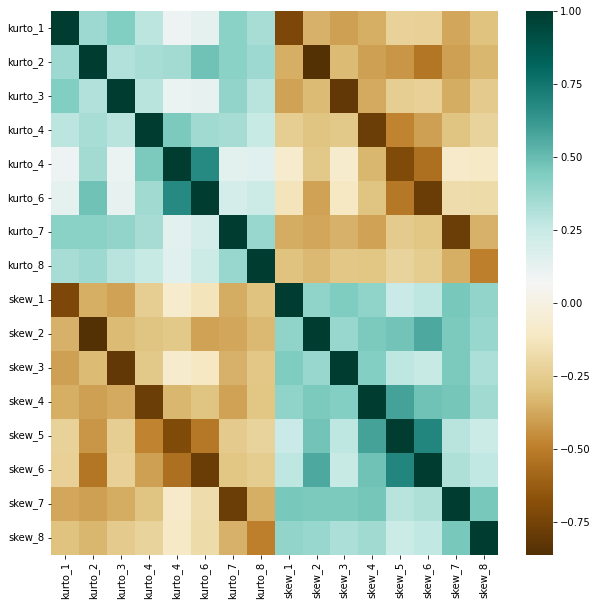

In [44]:
plt.figure(figsize=(10,10))
c = x.corr(method='pearson')
ax = sns.heatmap(c, cmap='BrBG')

In [45]:
corr_features = correlation(x, 0.75)
print(len(set(corr_features)))
print(corr_features)

5
{'skew_4', 'skew_3', 'skew_2', 'skew_7', 'skew_6'}


In [46]:
pearson_kurto_skew = x[['skew_3', 'skew_2', 'skew_7', 'skew_6', 'skew_4']]
pearson_kurto_skew

,skew_3,skew_2,skew_7,skew_6,skew_4
0,0.231987,-0.230562,-0.418176,0.788068,0.595935
1,0.316177,0.699081,-0.331850,-0.821074,0.423406
2,0.343633,-0.212890,0.402941,-1.102886,0.078139
3,0.482539,0.283943,0.948793,0.420860,-1.010797
4,0.989361,-1.907889,0.185246,-2.158363,-0.733552
...,...,...,...,...,...
4703,-2.126673,-1.736568,-2.313264,0.272413,-0.415372
4704,0.433441,-0.111356,-1.089747,-0.163674,0.292649
4705,-2.548111,0.590162,-3.346722,-1.102692,0.463829
4706,-1.361287,1.102710,-0.182617,-0.302259,-1.568907


In [47]:
x = pearson_kurto_skew
y = dataMean.iloc[:,8]

scaler = StandardScaler()
scaler.fit(x, y)

cv = KFold(n_splits=10, random_state=1, shuffle=True)
model =   RandomForestClassifier(n_estimators=64)

scores = cross_val_score(model, x, y, scoring='accuracy',
                         cv=cv, n_jobs=-1)

print("Cross-validation scores: ", scores)
print("Mean cross-validation score: ", scores.mean())

Cross-validation scores:  [0.66666667 0.66878981 0.66029724 0.69002123 0.67515924 0.6433121
 0.7133758  0.7133758  0.65319149 0.62553191]
Mean cross-validation score:  0.6709721281113069


In [48]:
x = dataStd
y = dataMean.iloc[:,8]

scaler = StandardScaler()
scaler.fit(x, y)

cv = KFold(n_splits=10, random_state=1, shuffle=True)
model =   RandomForestClassifier(n_estimators=64)

scores = cross_val_score(model, x, y, scoring='accuracy',
                         cv=cv, n_jobs=-1)

print("Cross-validation scores: ", scores)
print("Mean cross-validation score: ", scores.mean())

Cross-validation scores:  [0.69002123 0.67940552 0.69002123 0.69002123 0.70063694 0.68577495
 0.70276008 0.70276008 0.69361702 0.65106383]
Mean cross-validation score:  0.6886082124949179


In [49]:
sampling = 0
data25 = pd.DataFrame([])
for samp in data2.sampling_id:
    dataaa = pd.DataFrame([])
    if samp == sampling:
        continue
    else:
        print(samp)
        newdata25 = data2.groupby('sampling_id')
        data1 = newdata25.get_group(samp)
        for j in range(8):
            data=[]
            data.append(np.percentile(data1.iloc[:,j],25))
            dataaa[j]=data
        sampling = samp
    data25 = pd.concat([data25, dataaa], ignore_index = False)

457.0
468.0
470.0
488.0
489.0
490.0
492.0
493.0
494.0
495.0
496.0
497.0
498.0
499.0
500.0
501.0
536.0
537.0
538.0
539.0
540.0
541.0
542.0
543.0
544.0
545.0
546.0
547.0
548.0
549.0
550.0
551.0
552.0
553.0
554.0
555.0
556.0
557.0
558.0
559.0
560.0
567.0
568.0
569.0
570.0
571.0
572.0
573.0
574.0
575.0
576.0
577.0
578.0
579.0
580.0
581.0
582.0
583.0
584.0
585.0
586.0
587.0
588.0
589.0
590.0
591.0
596.0
597.0
598.0
599.0
600.0
601.0
602.0
603.0
604.0
605.0
607.0
616.0
617.0
618.0
619.0
620.0
621.0
622.0
623.0
624.0
625.0
626.0
627.0
628.0
629.0
630.0
631.0
632.0
634.0
635.0
636.0
637.0
638.0
639.0
640.0
641.0
642.0
643.0
652.0
653.0
654.0
655.0
656.0
657.0
658.0
659.0
660.0
661.0
662.0
663.0
664.0
665.0
666.0
667.0
668.0
669.0
670.0
671.0
672.0
673.0
674.0
675.0
679.0
680.0
681.0
689.0
690.0
691.0
692.0
693.0
694.0
695.0
696.0
697.0
698.0
699.0
700.0
701.0
702.0
703.0
704.0
705.0
706.0
707.0
708.0
709.0
710.0
711.0
712.0
713.0
714.0
715.0
716.0
717.0
718.0
719.0
720.0
721.0
722.0
723.0
724.

4220.0
4222.0
4224.0
4226.0
4230.0
4234.0
4253.0
4254.0
4255.0
4256.0
4257.0
4258.0
4259.0
4260.0
4263.0
4264.0
4265.0
4266.0
4267.0
4268.0
4269.0
4270.0
4271.0
4272.0
4273.0
4274.0
4275.0
4277.0
4278.0
4279.0
4280.0
4281.0
4282.0
4283.0
4284.0
4285.0
4287.0
4288.0
4295.0
4296.0
4300.0
4301.0
4302.0
4304.0
4306.0
4308.0
4309.0
4311.0
4323.0
4324.0
4325.0
4326.0
4327.0
4328.0
4329.0
4330.0
4331.0
4332.0
4333.0
4334.0
4335.0
4336.0
4344.0
4345.0
4346.0
4347.0
4348.0
4349.0
4350.0
4351.0
4352.0
4353.0
4354.0
4366.0
4367.0
4368.0
4369.0
4371.0
4372.0
4374.0
4376.0
4378.0
4380.0
4388.0
4389.0
4390.0
4391.0
4392.0
4393.0
4394.0
4396.0
4399.0
4400.0
4402.0
4404.0
4408.0
4410.0
4414.0
4416.0
4419.0
4425.0
4432.0
4433.0
4434.0
4435.0
4436.0
4437.0
4438.0
4463.0
4464.0
4465.0
4466.0
4473.0
4475.0
4478.0
4479.0
4480.0
4483.0
4558.0
4559.0
4560.0
4561.0
4562.0
4563.0
4564.0
4565.0
4566.0
4569.0
4572.0
4576.0
4578.0
4580.0
4582.0
4586.0
4588.0
4590.0
4591.0
4593.0
4602.0
4605.0
4606.0
4607.0
4608.0

6319.0
6320.0
6321.0
6322.0
6323.0
6324.0
6325.0
6326.0
6327.0
6329.0
6394.0
6398.0
6400.0
6405.0
6408.0
6414.0
6415.0
6416.0
6417.0
6418.0
6419.0
6420.0
6421.0
6422.0
6423.0
6424.0
6426.0
6427.0
6428.0
6429.0
6430.0
6444.0
6445.0
6447.0
6451.0
6452.0
6453.0
6454.0
6455.0
6457.0
6458.0
6459.0
6460.0
6461.0
6466.0
6468.0
6469.0
6471.0
6472.0
6473.0
6475.0
6476.0
6477.0
6478.0
6479.0
6480.0
6481.0
6482.0
6483.0
6484.0
6485.0
6486.0
6487.0
6488.0
6489.0
6490.0
6492.0
6493.0
6494.0
6495.0
6497.0
6498.0
6499.0
6500.0
6501.0
6502.0
6503.0
6504.0
6505.0
6506.0
6507.0
6533.0
6534.0
6535.0
6536.0
6537.0
6538.0
6539.0
6540.0
6542.0
6543.0
6544.0
6545.0
6546.0
6566.0
6567.0
6568.0
6569.0
6570.0
6571.0
6572.0
6573.0
6574.0
6575.0
6576.0
6577.0
6578.0
6579.0
6580.0
6581.0
6582.0
6583.0
6584.0
6585.0
6587.0
6589.0
6626.0
6628.0
6629.0
6630.0
6631.0
6632.0
6633.0
6634.0
6635.0
6636.0
6637.0
6638.0
6639.0
6640.0
6641.0
6642.0
6643.0
6645.0
6647.0
6648.0
6649.0
6650.0
6651.0
6652.0
6653.0
6654.0
6655.0

8363.0
8366.0
8367.0
8368.0
8375.0
8376.0
8377.0
8378.0
8379.0
8380.0
8381.0
8382.0
8385.0
8386.0
8387.0
8388.0
8393.0
8395.0
8396.0
8399.0
8400.0
8401.0
8404.0
8405.0
8408.0
8409.0
8410.0
8411.0
8412.0
8413.0
8414.0
8415.0
8417.0
8418.0
8419.0
8420.0
8421.0
8422.0
8424.0
8425.0
8426.0
8428.0
8430.0
8432.0
8434.0
8435.0
8436.0
8438.0
8440.0
8442.0
8443.0
8444.0
8446.0
8447.0
8448.0
8449.0
8450.0
8451.0
8452.0
8453.0
8454.0
8455.0
8456.0
8457.0
8458.0
8460.0
8461.0
8462.0
8463.0
8464.0
8465.0
8466.0
8467.0
8468.0
8469.0
8470.0
8478.0
8488.0
8489.0
8494.0
8497.0
8498.0
8501.0
8504.0
8505.0
8506.0
8511.0
8512.0
8513.0
8518.0
8523.0
8524.0
8526.0
8527.0
8528.0
8529.0
8530.0
8531.0
8533.0
8534.0
8536.0
8537.0
8539.0
8540.0
8541.0
8542.0
8543.0
8545.0
8546.0
8547.0
8548.0
8549.0
8550.0
8551.0
8552.0
8554.0
8555.0
8556.0
8557.0
8558.0
8559.0
8560.0
8561.0
8562.0
8563.0
8564.0
8565.0
8569.0
8570.0
8589.0
8590.0
8591.0
8592.0
8593.0
8594.0
8597.0
8598.0
8599.0
8600.0
8601.0
8602.0
8603.0
8604.0

11159.0
11160.0
11161.0
11162.0
11163.0
11164.0
11165.0
11166.0
11167.0
11168.0
11169.0
11170.0
11171.0
11172.0
11173.0
11174.0
11175.0
11176.0
11177.0
11178.0
11180.0
11181.0
11182.0
11183.0
11184.0
11185.0
11189.0
11190.0
11191.0
11192.0
11193.0
11194.0
11195.0
11196.0
11207.0
11208.0
11209.0
11210.0
11211.0
nan


KeyError: nan

In [50]:
data_25 = data25.rename(columns={0:'p25_1', 1:'p25_2', 2:'p25_3', 3:'p25_4', 4:'p25_5', 5:'p25_6', 6:'p25_7', 7:'p25_8'})
data_25.reset_index(inplace=True)
data_252 = data_25.drop(['index'], axis=1)
data_252

,p25_1,p25_2,p25_3,p25_4,p25_5,p25_6,p25_7,p25_8
0,389.440150,506.867938,369.357520,568.935258,800.873282,864.723877,455.898317,426.501133
1,456.022431,439.821177,517.123483,582.630857,823.891216,822.300954,537.645743,491.108966
2,395.047676,375.304050,466.960662,562.855815,781.959548,768.366889,513.805840,476.897767
3,322.449251,322.163383,364.388175,534.829787,654.596940,563.450982,462.383236,433.605018
4,316.636969,309.930178,363.483809,526.407768,633.179225,563.340262,469.854992,432.120959
...,...,...,...,...,...,...,...,...
4703,449.168135,357.852470,332.653190,328.444530,378.661368,612.615100,427.228215,427.312799
4704,455.192783,323.548292,321.220169,304.540845,370.252699,622.059686,437.762030,433.881010
4705,467.811827,317.858383,323.374653,319.251611,386.229323,630.670560,442.016660,449.863360
4706,471.703533,316.882243,323.187641,328.593593,390.855912,634.673680,445.121526,450.238288


In [51]:
sampling = 0
data50 = pd.DataFrame([])
for samp in data2.sampling_id:
    dataaa = pd.DataFrame([])
    if samp == sampling:
        continue
    else:
        print(samp)
        newdata50 = data2.groupby('sampling_id')
        data1 = newdata50.get_group(samp)
        for j in range(8):
            data=[]
            data.append(np.percentile(data1.iloc[:,j],50))
            dataaa[j]=data
        sampling = samp
    data50 = pd.concat([data50, dataaa], ignore_index = False)

457.0
468.0
470.0
488.0
489.0
490.0
492.0
493.0
494.0
495.0
496.0
497.0
498.0
499.0
500.0
501.0
536.0
537.0
538.0
539.0
540.0
541.0
542.0
543.0
544.0
545.0
546.0
547.0
548.0
549.0
550.0
551.0
552.0
553.0
554.0
555.0
556.0
557.0
558.0
559.0
560.0
567.0
568.0
569.0
570.0
571.0
572.0
573.0
574.0
575.0
576.0
577.0
578.0
579.0
580.0
581.0
582.0
583.0
584.0
585.0
586.0
587.0
588.0
589.0
590.0
591.0
596.0
597.0
598.0
599.0
600.0
601.0
602.0
603.0
604.0
605.0
607.0
616.0
617.0
618.0
619.0
620.0
621.0
622.0
623.0
624.0
625.0
626.0
627.0
628.0
629.0
630.0
631.0
632.0
634.0
635.0
636.0
637.0
638.0
639.0
640.0
641.0
642.0
643.0
652.0
653.0
654.0
655.0
656.0
657.0
658.0
659.0
660.0
661.0
662.0
663.0
664.0
665.0
666.0
667.0
668.0
669.0
670.0
671.0
672.0
673.0
674.0
675.0
679.0
680.0
681.0
689.0
690.0
691.0
692.0
693.0
694.0
695.0
696.0
697.0
698.0
699.0
700.0
701.0
702.0
703.0
704.0
705.0
706.0
707.0
708.0
709.0
710.0
711.0
712.0
713.0
714.0
715.0
716.0
717.0
718.0
719.0
720.0
721.0
722.0
723.0
724.

4220.0
4222.0
4224.0
4226.0
4230.0
4234.0
4253.0
4254.0
4255.0
4256.0
4257.0
4258.0
4259.0
4260.0
4263.0
4264.0
4265.0
4266.0
4267.0
4268.0
4269.0
4270.0
4271.0
4272.0
4273.0
4274.0
4275.0
4277.0
4278.0
4279.0
4280.0
4281.0
4282.0
4283.0
4284.0
4285.0
4287.0
4288.0
4295.0
4296.0
4300.0
4301.0
4302.0
4304.0
4306.0
4308.0
4309.0
4311.0
4323.0
4324.0
4325.0
4326.0
4327.0
4328.0
4329.0
4330.0
4331.0
4332.0
4333.0
4334.0
4335.0
4336.0
4344.0
4345.0
4346.0
4347.0
4348.0
4349.0
4350.0
4351.0
4352.0
4353.0
4354.0
4366.0
4367.0
4368.0
4369.0
4371.0
4372.0
4374.0
4376.0
4378.0
4380.0
4388.0
4389.0
4390.0
4391.0
4392.0
4393.0
4394.0
4396.0
4399.0
4400.0
4402.0
4404.0
4408.0
4410.0
4414.0
4416.0
4419.0
4425.0
4432.0
4433.0
4434.0
4435.0
4436.0
4437.0
4438.0
4463.0
4464.0
4465.0
4466.0
4473.0
4475.0
4478.0
4479.0
4480.0
4483.0
4558.0
4559.0
4560.0
4561.0
4562.0
4563.0
4564.0
4565.0
4566.0
4569.0
4572.0
4576.0
4578.0
4580.0
4582.0
4586.0
4588.0
4590.0
4591.0
4593.0
4602.0
4605.0
4606.0
4607.0
4608.0

6321.0
6322.0
6323.0
6324.0
6325.0
6326.0
6327.0
6329.0
6394.0
6398.0
6400.0
6405.0
6408.0
6414.0
6415.0
6416.0
6417.0
6418.0
6419.0
6420.0
6421.0
6422.0
6423.0
6424.0
6426.0
6427.0
6428.0
6429.0
6430.0
6444.0
6445.0
6447.0
6451.0
6452.0
6453.0
6454.0
6455.0
6457.0
6458.0
6459.0
6460.0
6461.0
6466.0
6468.0
6469.0
6471.0
6472.0
6473.0
6475.0
6476.0
6477.0
6478.0
6479.0
6480.0
6481.0
6482.0
6483.0
6484.0
6485.0
6486.0
6487.0
6488.0
6489.0
6490.0
6492.0
6493.0
6494.0
6495.0
6497.0
6498.0
6499.0
6500.0
6501.0
6502.0
6503.0
6504.0
6505.0
6506.0
6507.0
6533.0
6534.0
6535.0
6536.0
6537.0
6538.0
6539.0
6540.0
6542.0
6543.0
6544.0
6545.0
6546.0
6566.0
6567.0
6568.0
6569.0
6570.0
6571.0
6572.0
6573.0
6574.0
6575.0
6576.0
6577.0
6578.0
6579.0
6580.0
6581.0
6582.0
6583.0
6584.0
6585.0
6587.0
6589.0
6626.0
6628.0
6629.0
6630.0
6631.0
6632.0
6633.0
6634.0
6635.0
6636.0
6637.0
6638.0
6639.0
6640.0
6641.0
6642.0
6643.0
6645.0
6647.0
6648.0
6649.0
6650.0
6651.0
6652.0
6653.0
6654.0
6655.0
6657.0
6658.0

8375.0
8376.0
8377.0
8378.0
8379.0
8380.0
8381.0
8382.0
8385.0
8386.0
8387.0
8388.0
8393.0
8395.0
8396.0
8399.0
8400.0
8401.0
8404.0
8405.0
8408.0
8409.0
8410.0
8411.0
8412.0
8413.0
8414.0
8415.0
8417.0
8418.0
8419.0
8420.0
8421.0
8422.0
8424.0
8425.0
8426.0
8428.0
8430.0
8432.0
8434.0
8435.0
8436.0
8438.0
8440.0
8442.0
8443.0
8444.0
8446.0
8447.0
8448.0
8449.0
8450.0
8451.0
8452.0
8453.0
8454.0
8455.0
8456.0
8457.0
8458.0
8460.0
8461.0
8462.0
8463.0
8464.0
8465.0
8466.0
8467.0
8468.0
8469.0
8470.0
8478.0
8488.0
8489.0
8494.0
8497.0
8498.0
8501.0
8504.0
8505.0
8506.0
8511.0
8512.0
8513.0
8518.0
8523.0
8524.0
8526.0
8527.0
8528.0
8529.0
8530.0
8531.0
8533.0
8534.0
8536.0
8537.0
8539.0
8540.0
8541.0
8542.0
8543.0
8545.0
8546.0
8547.0
8548.0
8549.0
8550.0
8551.0
8552.0
8554.0
8555.0
8556.0
8557.0
8558.0
8559.0
8560.0
8561.0
8562.0
8563.0
8564.0
8565.0
8569.0
8570.0
8589.0
8590.0
8591.0
8592.0
8593.0
8594.0
8597.0
8598.0
8599.0
8600.0
8601.0
8602.0
8603.0
8604.0
8605.0
8606.0
8607.0
8608.0

11163.0
11164.0
11165.0
11166.0
11167.0
11168.0
11169.0
11170.0
11171.0
11172.0
11173.0
11174.0
11175.0
11176.0
11177.0
11178.0
11180.0
11181.0
11182.0
11183.0
11184.0
11185.0
11189.0
11190.0
11191.0
11192.0
11193.0
11194.0
11195.0
11196.0
11207.0
11208.0
11209.0
11210.0
11211.0
nan


KeyError: nan

In [52]:
data_50 = data50.rename(columns={0:'p50_1', 1:'p50_2', 2:'p50_3', 3:'p50_4', 4:'p50_5', 5:'p50_6', 6:'p50_7', 7:'p50_8'})
data_50.reset_index(inplace=True)
data_502 = data_50.drop(['index'], axis=1)
data_502

,p50_1,p50_2,p50_3,p50_4,p50_5,p50_6,p50_7,p50_8
0,391.032638,511.780519,372.441071,570.220405,807.499592,868.460023,457.818923,428.122780
1,467.533090,442.615784,526.867160,585.615335,829.259292,825.926830,542.361784,495.110334
2,399.930678,385.325292,472.071544,567.640506,785.078475,773.987540,517.711440,479.719679
3,327.837930,326.820135,367.501691,535.887247,657.887029,575.582915,464.677311,437.226814
4,319.353563,312.965259,365.326576,528.447359,636.804093,568.090064,471.828020,433.613750
...,...,...,...,...,...,...,...,...
4703,453.417499,360.917880,333.648373,332.034556,384.081379,622.988329,430.927296,429.861911
4704,460.897468,329.840290,322.946432,308.918690,374.161970,625.602856,438.752632,443.057111
4705,469.421242,320.737194,324.876956,320.121098,392.258819,640.737935,443.021712,452.930120
4706,474.881074,317.327454,324.316398,329.761139,397.902935,658.426099,448.201518,453.426480


In [53]:
sampling = 0
data75 = pd.DataFrame([])
for samp in data2.sampling_id:
    dataaa = pd.DataFrame([])
    if samp == sampling:
        continue
    else:
        print(samp)
        newdata75 = data2.groupby('sampling_id')
        data1 = newdata75.get_group(samp)
        for j in range(8):
            data=[]
            data.append(np.percentile(data1.iloc[:,j],75))
            dataaa[j]=data
        sampling = samp
    data75 = pd.concat([data75, dataaa], ignore_index = False)

457.0
468.0
470.0
488.0
489.0
490.0
492.0
493.0
494.0
495.0
496.0
497.0
498.0
499.0
500.0
501.0
536.0
537.0
538.0
539.0
540.0
541.0
542.0
543.0
544.0
545.0
546.0
547.0
548.0
549.0
550.0
551.0
552.0
553.0
554.0
555.0
556.0
557.0
558.0
559.0
560.0
567.0
568.0
569.0
570.0
571.0
572.0
573.0
574.0
575.0
576.0
577.0
578.0
579.0
580.0
581.0
582.0
583.0
584.0
585.0
586.0
587.0
588.0
589.0
590.0
591.0
596.0
597.0
598.0
599.0
600.0
601.0
602.0
603.0
604.0
605.0
607.0
616.0
617.0
618.0
619.0
620.0
621.0
622.0
623.0
624.0
625.0
626.0
627.0
628.0
629.0
630.0
631.0
632.0
634.0
635.0
636.0
637.0
638.0
639.0
640.0
641.0
642.0
643.0
652.0
653.0
654.0
655.0
656.0
657.0
658.0
659.0
660.0
661.0
662.0
663.0
664.0
665.0
666.0
667.0
668.0
669.0
670.0
671.0
672.0
673.0
674.0
675.0
679.0
680.0
681.0
689.0
690.0
691.0
692.0
693.0
694.0
695.0
696.0
697.0
698.0
699.0
700.0
701.0
702.0
703.0
704.0
705.0
706.0
707.0
708.0
709.0
710.0
711.0
712.0
713.0
714.0
715.0
716.0
717.0
718.0
719.0
720.0
721.0
722.0
723.0
724.

4220.0
4222.0
4224.0
4226.0
4230.0
4234.0
4253.0
4254.0
4255.0
4256.0
4257.0
4258.0
4259.0
4260.0
4263.0
4264.0
4265.0
4266.0
4267.0
4268.0
4269.0
4270.0
4271.0
4272.0
4273.0
4274.0
4275.0
4277.0
4278.0
4279.0
4280.0
4281.0
4282.0
4283.0
4284.0
4285.0
4287.0
4288.0
4295.0
4296.0
4300.0
4301.0
4302.0
4304.0
4306.0
4308.0
4309.0
4311.0
4323.0
4324.0
4325.0
4326.0
4327.0
4328.0
4329.0
4330.0
4331.0
4332.0
4333.0
4334.0
4335.0
4336.0
4344.0
4345.0
4346.0
4347.0
4348.0
4349.0
4350.0
4351.0
4352.0
4353.0
4354.0
4366.0
4367.0
4368.0
4369.0
4371.0
4372.0
4374.0
4376.0
4378.0
4380.0
4388.0
4389.0
4390.0
4391.0
4392.0
4393.0
4394.0
4396.0
4399.0
4400.0
4402.0
4404.0
4408.0
4410.0
4414.0
4416.0
4419.0
4425.0
4432.0
4433.0
4434.0
4435.0
4436.0
4437.0
4438.0
4463.0
4464.0
4465.0
4466.0
4473.0
4475.0
4478.0
4479.0
4480.0
4483.0
4558.0
4559.0
4560.0
4561.0
4562.0
4563.0
4564.0
4565.0
4566.0
4569.0
4572.0
4576.0
4578.0
4580.0
4582.0
4586.0
4588.0
4590.0
4591.0
4593.0
4602.0
4605.0
4606.0
4607.0
4608.0

6321.0
6322.0
6323.0
6324.0
6325.0
6326.0
6327.0
6329.0
6394.0
6398.0
6400.0
6405.0
6408.0
6414.0
6415.0
6416.0
6417.0
6418.0
6419.0
6420.0
6421.0
6422.0
6423.0
6424.0
6426.0
6427.0
6428.0
6429.0
6430.0
6444.0
6445.0
6447.0
6451.0
6452.0
6453.0
6454.0
6455.0
6457.0
6458.0
6459.0
6460.0
6461.0
6466.0
6468.0
6469.0
6471.0
6472.0
6473.0
6475.0
6476.0
6477.0
6478.0
6479.0
6480.0
6481.0
6482.0
6483.0
6484.0
6485.0
6486.0
6487.0
6488.0
6489.0
6490.0
6492.0
6493.0
6494.0
6495.0
6497.0
6498.0
6499.0
6500.0
6501.0
6502.0
6503.0
6504.0
6505.0
6506.0
6507.0
6533.0
6534.0
6535.0
6536.0
6537.0
6538.0
6539.0
6540.0
6542.0
6543.0
6544.0
6545.0
6546.0
6566.0
6567.0
6568.0
6569.0
6570.0
6571.0
6572.0
6573.0
6574.0
6575.0
6576.0
6577.0
6578.0
6579.0
6580.0
6581.0
6582.0
6583.0
6584.0
6585.0
6587.0
6589.0
6626.0
6628.0
6629.0
6630.0
6631.0
6632.0
6633.0
6634.0
6635.0
6636.0
6637.0
6638.0
6639.0
6640.0
6641.0
6642.0
6643.0
6645.0
6647.0
6648.0
6649.0
6650.0
6651.0
6652.0
6653.0
6654.0
6655.0
6657.0
6658.0

8368.0
8375.0
8376.0
8377.0
8378.0
8379.0
8380.0
8381.0
8382.0
8385.0
8386.0
8387.0
8388.0
8393.0
8395.0
8396.0
8399.0
8400.0
8401.0
8404.0
8405.0
8408.0
8409.0
8410.0
8411.0
8412.0
8413.0
8414.0
8415.0
8417.0
8418.0
8419.0
8420.0
8421.0
8422.0
8424.0
8425.0
8426.0
8428.0
8430.0
8432.0
8434.0
8435.0
8436.0
8438.0
8440.0
8442.0
8443.0
8444.0
8446.0
8447.0
8448.0
8449.0
8450.0
8451.0
8452.0
8453.0
8454.0
8455.0
8456.0
8457.0
8458.0
8460.0
8461.0
8462.0
8463.0
8464.0
8465.0
8466.0
8467.0
8468.0
8469.0
8470.0
8478.0
8488.0
8489.0
8494.0
8497.0
8498.0
8501.0
8504.0
8505.0
8506.0
8511.0
8512.0
8513.0
8518.0
8523.0
8524.0
8526.0
8527.0
8528.0
8529.0
8530.0
8531.0
8533.0
8534.0
8536.0
8537.0
8539.0
8540.0
8541.0
8542.0
8543.0
8545.0
8546.0
8547.0
8548.0
8549.0
8550.0
8551.0
8552.0
8554.0
8555.0
8556.0
8557.0
8558.0
8559.0
8560.0
8561.0
8562.0
8563.0
8564.0
8565.0
8569.0
8570.0
8589.0
8590.0
8591.0
8592.0
8593.0
8594.0
8597.0
8598.0
8599.0
8600.0
8601.0
8602.0
8603.0
8604.0
8605.0
8606.0
8607.0

11162.0
11163.0
11164.0
11165.0
11166.0
11167.0
11168.0
11169.0
11170.0
11171.0
11172.0
11173.0
11174.0
11175.0
11176.0
11177.0
11178.0
11180.0
11181.0
11182.0
11183.0
11184.0
11185.0
11189.0
11190.0
11191.0
11192.0
11193.0
11194.0
11195.0
11196.0
11207.0
11208.0
11209.0
11210.0
11211.0
nan


KeyError: nan

In [54]:
data_75 = data75.rename(columns={0:'p75_1', 1:'p75_2', 2:'p75_3', 3:'p75_4', 4:'p75_5', 5:'p75_6', 6:'p75_7', 7:'p75_8'})
data_75.reset_index(inplace=True)
data_752 = data_75.drop(['index'], axis=1)
data_752

,p75_1,p75_2,p75_3,p75_4,p75_5,p75_6,p75_7,p75_8
0,394.049377,515.116431,375.055722,572.022263,809.343931,869.598844,459.040289,431.669172
1,477.633290,450.994945,534.311726,590.947999,838.308855,829.171073,548.356544,502.486041
2,406.131234,387.552324,477.894746,569.661252,787.120895,776.284398,523.270653,483.901261
3,332.849868,330.420292,373.441174,536.933369,663.149838,586.907017,467.068698,441.662696
4,321.425672,316.124697,369.032464,531.640710,640.415952,571.992107,473.288360,436.641196
...,...,...,...,...,...,...,...,...
4703,456.689349,362.318450,334.584701,336.449998,387.682256,639.099601,432.411550,434.606574
4704,466.361496,331.903763,328.598066,315.978751,384.486202,629.517286,440.896405,453.794848
4705,471.914084,323.863269,327.894724,325.214160,394.208569,647.817552,444.360346,454.297177
4706,479.024317,317.972823,331.304771,331.781275,401.394564,670.519304,453.100058,460.063042


In [55]:
data_25_50 = data_252.join(data_502)
data_25_50

,p25_1,p25_2,p25_3,p25_4,p25_5,p25_6,p25_7,p25_8,p50_1,p50_2,p50_3,p50_4,p50_5,p50_6,p50_7,p50_8
0,389.440150,506.867938,369.357520,568.935258,800.873282,864.723877,455.898317,426.501133,391.032638,511.780519,372.441071,570.220405,807.499592,868.460023,457.818923,428.122780
1,456.022431,439.821177,517.123483,582.630857,823.891216,822.300954,537.645743,491.108966,467.533090,442.615784,526.867160,585.615335,829.259292,825.926830,542.361784,495.110334
2,395.047676,375.304050,466.960662,562.855815,781.959548,768.366889,513.805840,476.897767,399.930678,385.325292,472.071544,567.640506,785.078475,773.987540,517.711440,479.719679
3,322.449251,322.163383,364.388175,534.829787,654.596940,563.450982,462.383236,433.605018,327.837930,326.820135,367.501691,535.887247,657.887029,575.582915,464.677311,437.226814
4,316.636969,309.930178,363.483809,526.407768,633.179225,563.340262,469.854992,432.120959,319.353563,312.965259,365.326576,528.447359,636.804093,568.090064,471.828020,433.613750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4703,449.168135,357.852470,332.653190,328.444530,378.661368,612.615100,427.228215,427.312799,453.417499,360.917880,333.648373,332.034556,384.081379,622.988329,430.927296,429.861911
4704,455.192783,323.548292,321.220169,304.540845,370.252699,622.059686,437.762030,433.881010,460.897468,329.840290,322.946432,308.918690,374.161970,625.602856,438.752632,443.057111
4705,467.811827,317.858383,323.374653,319.251611,386.229323,630.670560,442.016660,449.863360,469.421242,320.737194,324.876956,320.121098,392.258819,640.737935,443.021712,452.930120
4706,471.703533,316.882243,323.187641,328.593593,390.855912,634.673680,445.121526,450.238288,474.881074,317.327454,324.316398,329.761139,397.902935,658.426099,448.201518,453.426480


In [56]:
data_25_50_75 = data_25_50.join(data_752)
data_25_50_75

,p25_1,p25_2,p25_3,p25_4,p25_5,p25_6,p25_7,p25_8,p50_1,p50_2,...,p50_7,p50_8,p75_1,p75_2,p75_3,p75_4,p75_5,p75_6,p75_7,p75_8
0,389.440150,506.867938,369.357520,568.935258,800.873282,864.723877,455.898317,426.501133,391.032638,511.780519,...,457.818923,428.122780,394.049377,515.116431,375.055722,572.022263,809.343931,869.598844,459.040289,431.669172
1,456.022431,439.821177,517.123483,582.630857,823.891216,822.300954,537.645743,491.108966,467.533090,442.615784,...,542.361784,495.110334,477.633290,450.994945,534.311726,590.947999,838.308855,829.171073,548.356544,502.486041
2,395.047676,375.304050,466.960662,562.855815,781.959548,768.366889,513.805840,476.897767,399.930678,385.325292,...,517.711440,479.719679,406.131234,387.552324,477.894746,569.661252,787.120895,776.284398,523.270653,483.901261
3,322.449251,322.163383,364.388175,534.829787,654.596940,563.450982,462.383236,433.605018,327.837930,326.820135,...,464.677311,437.226814,332.849868,330.420292,373.441174,536.933369,663.149838,586.907017,467.068698,441.662696
4,316.636969,309.930178,363.483809,526.407768,633.179225,563.340262,469.854992,432.120959,319.353563,312.965259,...,471.828020,433.613750,321.425672,316.124697,369.032464,531.640710,640.415952,571.992107,473.288360,436.641196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4703,449.168135,357.852470,332.653190,328.444530,378.661368,612.615100,427.228215,427.312799,453.417499,360.917880,...,430.927296,429.861911,456.689349,362.318450,334.584701,336.449998,387.682256,639.099601,432.411550,434.606574
4704,455.192783,323.548292,321.220169,304.540845,370.252699,622.059686,437.762030,433.881010,460.897468,329.840290,...,438.752632,443.057111,466.361496,331.903763,328.598066,315.978751,384.486202,629.517286,440.896405,453.794848
4705,467.811827,317.858383,323.374653,319.251611,386.229323,630.670560,442.016660,449.863360,469.421242,320.737194,...,443.021712,452.930120,471.914084,323.863269,327.894724,325.214160,394.208569,647.817552,444.360346,454.297177
4706,471.703533,316.882243,323.187641,328.593593,390.855912,634.673680,445.121526,450.238288,474.881074,317.327454,...,448.201518,453.426480,479.024317,317.972823,331.304771,331.781275,401.394564,670.519304,453.100058,460.063042


In [57]:
x = data_25_50_75
y = dataMean.iloc[:,8]

scaler = StandardScaler()
scaler.fit(x, y)

cv = KFold(n_splits=10, random_state=1, shuffle=True)
model =   RandomForestClassifier(n_estimators=64)

scores = cross_val_score(model, x, y, scoring='accuracy',
                         cv=cv, n_jobs=-1)

print("Cross-validation scores: ", scores)
print("Mean cross-validation score: ", scores.mean())

Cross-validation scores:  [0.76857749 0.75583864 0.77919321 0.78343949 0.76220807 0.7537155
 0.76220807 0.76220807 0.76808511 0.75319149]
Mean cross-validation score:  0.764866513077653


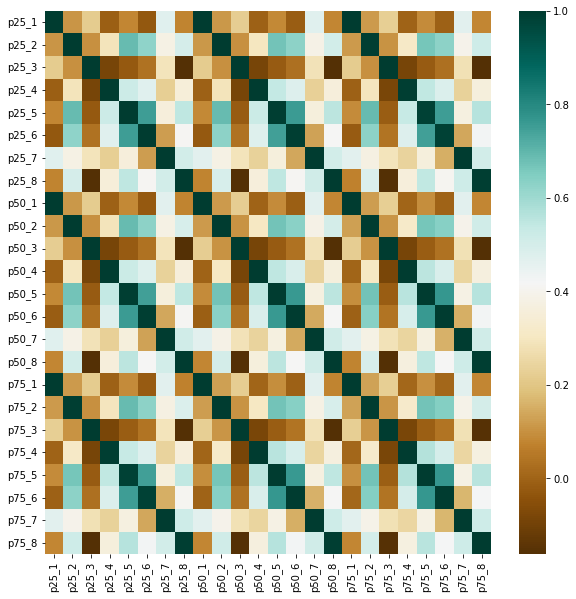

In [58]:
plt.figure(figsize=(10,10))
c = x.corr(method='pearson')
ax = sns.heatmap(c, cmap='BrBG')

In [59]:
corr_features = correlation(x, 0.9)
print(len(set(corr_features)))
print(corr_features)

16
{'p75_4', 'p75_1', 'p50_1', 'p50_3', 'p50_6', 'p75_7', 'p75_3', 'p50_4', 'p75_6', 'p50_7', 'p50_5', 'p75_8', 'p50_2', 'p50_8', 'p75_5', 'p75_2'}


In [60]:
pearson_25_50_75 = x[['p75_4', 'p75_1', 'p50_1', 'p50_3', 'p50_6', 'p75_7', 'p75_3', 'p50_4', 'p75_6', 'p50_7', 'p50_5', 'p75_8', 'p50_2', 'p50_8', 'p75_5', 'p75_2']]
pearson_25_50_75

,p75_4,p75_1,p50_1,p50_3,p50_6,p75_7,p75_3,p50_4,p75_6,p50_7,p50_5,p75_8,p50_2,p50_8,p75_5,p75_2
0,572.022263,394.049377,391.032638,372.441071,868.460023,459.040289,375.055722,570.220405,869.598844,457.818923,807.499592,431.669172,511.780519,428.122780,809.343931,515.116431
1,590.947999,477.633290,467.533090,526.867160,825.926830,548.356544,534.311726,585.615335,829.171073,542.361784,829.259292,502.486041,442.615784,495.110334,838.308855,450.994945
2,569.661252,406.131234,399.930678,472.071544,773.987540,523.270653,477.894746,567.640506,776.284398,517.711440,785.078475,483.901261,385.325292,479.719679,787.120895,387.552324
3,536.933369,332.849868,327.837930,367.501691,575.582915,467.068698,373.441174,535.887247,586.907017,464.677311,657.887029,441.662696,326.820135,437.226814,663.149838,330.420292
4,531.640710,321.425672,319.353563,365.326576,568.090064,473.288360,369.032464,528.447359,571.992107,471.828020,636.804093,436.641196,312.965259,433.613750,640.415952,316.124697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4703,336.449998,456.689349,453.417499,333.648373,622.988329,432.411550,334.584701,332.034556,639.099601,430.927296,384.081379,434.606574,360.917880,429.861911,387.682256,362.318450
4704,315.978751,466.361496,460.897468,322.946432,625.602856,440.896405,328.598066,308.918690,629.517286,438.752632,374.161970,453.794848,329.840290,443.057111,384.486202,331.903763
4705,325.214160,471.914084,469.421242,324.876956,640.737935,444.360346,327.894724,320.121098,647.817552,443.021712,392.258819,454.297177,320.737194,452.930120,394.208569,323.863269
4706,331.781275,479.024317,474.881074,324.316398,658.426099,453.100058,331.304771,329.761139,670.519304,448.201518,397.902935,460.063042,317.327454,453.426480,401.394564,317.972823


In [61]:
x = pearson_25_50_75
y = dataMean.iloc[:,8]

scaler = StandardScaler()
scaler.fit(x, y)

cv = KFold(n_splits=10, random_state=1, shuffle=True)
model =   RandomForestClassifier(n_estimators=64)

scores = cross_val_score(model, x, y, scoring='accuracy',
                         cv=cv, n_jobs=-1)

print("Cross-validation scores: ", scores)
print("Mean cross-validation score: ", scores.mean())

Cross-validation scores:  [0.76645435 0.76645435 0.77070064 0.78556263 0.76857749 0.75159236
 0.76433121 0.75583864 0.76382979 0.75106383]
Mean cross-validation score:  0.7644405294303656


In [62]:
data_sampling = pd.DataFrame(dataMean.index)
data_sampling

,sampling_id
0,457.0
1,468.0
2,470.0
3,488.0
4,489.0
...,...
4703,11207.0
4704,11208.0
4705,11209.0
4706,11210.0


In [63]:
data_kur_skew = data_kurto_skew.join(data_sampling)
data_kur_skew2 = data_kur_skew.set_index('sampling_id')
data_kur_skew2

,kurto_1,kurto_2,kurto_3,kurto_4,kurto_4,kurto_6,kurto_7,kurto_8,skew_1,skew_2,skew_3,skew_4,skew_5,skew_6,skew_7,skew_8
sampling_id,,,,,,,,,,,,,,,,
457.0,-0.475477,-1.063353,-0.109006,-0.209763,-1.072606,0.145090,0.679229,-0.100783,0.199908,-0.230562,0.231987,0.595935,-0.228721,0.788068,-0.418176,0.462138
468.0,-0.243793,-0.730032,-0.742141,-1.236952,-0.998850,0.599490,-1.011331,-1.106044,0.638422,0.699081,0.316177,0.423406,0.504138,-0.821074,-0.331850,-0.143874
470.0,-0.857822,0.090649,-1.151135,-0.758309,-0.073692,0.853296,-1.099281,0.002499,0.393488,-0.212890,0.343633,0.078139,-0.182991,-1.102886,0.402941,-0.003807
488.0,-1.067892,-0.646509,-1.084602,0.991273,-0.093114,-1.063476,0.745019,-0.591120,0.385439,0.283943,0.482539,-1.010797,0.145950,0.420860,0.948793,0.565563
489.0,0.923905,6.142641,-0.042934,1.469695,5.538247,5.441038,0.788319,-1.275922,-0.204721,-1.907889,0.989361,-0.733552,-2.043111,-2.158363,0.185246,0.325876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11207.0,2.252727,3.238856,14.538785,-0.535269,2.477699,-1.040431,11.266669,0.391178,-0.144117,-1.736568,-2.126673,-0.415372,-1.187696,0.272413,-2.313264,0.353441
11208.0,-1.196845,-1.141265,0.361359,-1.286393,-1.093636,-0.789965,3.387231,-1.559876,0.043601,-0.111356,0.433441,0.292649,0.349017,-0.163674,-1.089747,-0.031530
11209.0,9.833162,-0.511888,13.447490,-0.558803,1.393383,-0.039273,13.745154,7.318565,-2.741427,0.590162,-2.548111,0.463829,-1.128225,-1.102692,-3.346722,-2.440175


In [64]:
data_y = y
data_y

sampling_id
457.0      1.0
468.0      0.0
470.0      1.0
488.0      1.0
489.0      1.0
          ... 
11207.0    0.0
11208.0    0.0
11209.0    0.0
11210.0    0.0
11211.0    0.0
Name: covid_status, Length: 4708, dtype: float64

In [65]:
data_percentile = data_25_50_75.join(data_sampling)
data_percentile2 = data_percentile.set_index('sampling_id')
data_percentile2

,p25_1,p25_2,p25_3,p25_4,p25_5,p25_6,p25_7,p25_8,p50_1,p50_2,...,p50_7,p50_8,p75_1,p75_2,p75_3,p75_4,p75_5,p75_6,p75_7,p75_8
sampling_id,,,,,,,,,,,,,,,,,,,,,
457.0,389.440150,506.867938,369.357520,568.935258,800.873282,864.723877,455.898317,426.501133,391.032638,511.780519,...,457.818923,428.122780,394.049377,515.116431,375.055722,572.022263,809.343931,869.598844,459.040289,431.669172
468.0,456.022431,439.821177,517.123483,582.630857,823.891216,822.300954,537.645743,491.108966,467.533090,442.615784,...,542.361784,495.110334,477.633290,450.994945,534.311726,590.947999,838.308855,829.171073,548.356544,502.486041
470.0,395.047676,375.304050,466.960662,562.855815,781.959548,768.366889,513.805840,476.897767,399.930678,385.325292,...,517.711440,479.719679,406.131234,387.552324,477.894746,569.661252,787.120895,776.284398,523.270653,483.901261
488.0,322.449251,322.163383,364.388175,534.829787,654.596940,563.450982,462.383236,433.605018,327.837930,326.820135,...,464.677311,437.226814,332.849868,330.420292,373.441174,536.933369,663.149838,586.907017,467.068698,441.662696
489.0,316.636969,309.930178,363.483809,526.407768,633.179225,563.340262,469.854992,432.120959,319.353563,312.965259,...,471.828020,433.613750,321.425672,316.124697,369.032464,531.640710,640.415952,571.992107,473.288360,436.641196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11207.0,449.168135,357.852470,332.653190,328.444530,378.661368,612.615100,427.228215,427.312799,453.417499,360.917880,...,430.927296,429.861911,456.689349,362.318450,334.584701,336.449998,387.682256,639.099601,432.411550,434.606574
11208.0,455.192783,323.548292,321.220169,304.540845,370.252699,622.059686,437.762030,433.881010,460.897468,329.840290,...,438.752632,443.057111,466.361496,331.903763,328.598066,315.978751,384.486202,629.517286,440.896405,453.794848
11209.0,467.811827,317.858383,323.374653,319.251611,386.229323,630.670560,442.016660,449.863360,469.421242,320.737194,...,443.021712,452.930120,471.914084,323.863269,327.894724,325.214160,394.208569,647.817552,444.360346,454.297177


In [66]:
data_full1 = data_mean_min_max_std.join(data_kur_skew2)
data_full = data_full1.join(data_percentile2)
data_full

,mean_1,mean_2,mean_3,mean_4,mean_5,mean_6,mean_7,mean_8,min_1,min_2,...,p50_7,p50_8,p75_1,p75_2,p75_3,p75_4,p75_5,p75_6,p75_7,p75_8
sampling_id,,,,,,,,,,,,,,,,,,,,,
457.0,391.811120,511.176759,372.392556,570.564372,805.706117,868.255397,457.411719,429.147238,384.408905,499.289940,...,457.818923,428.122780,394.049377,515.116431,375.055722,572.022263,809.343931,869.598844,459.040289,431.669172
468.0,469.101792,445.483409,527.044728,586.702587,831.748006,824.295481,542.123380,496.043832,440.799592,435.425226,...,542.361784,495.110334,477.633290,450.994945,534.311726,590.947999,838.308855,829.171073,548.356544,502.486041
470.0,401.134826,382.895893,472.740969,566.917190,784.549747,771.381253,518.755444,480.509642,385.299110,359.228917,...,517.711440,479.719679,406.131234,387.552324,477.894746,569.661252,787.120895,776.284398,523.270653,483.901261
488.0,327.988727,326.461283,369.112173,535.493725,658.513084,576.780891,465.233949,437.767543,320.254164,317.963917,...,464.677311,437.226814,332.849868,330.420292,373.441174,536.933369,663.149838,586.907017,467.068698,441.662696
489.0,319.160616,312.565552,366.774607,528.834729,635.434800,565.137312,471.717193,434.375474,308.839901,293.160665,...,471.828020,433.613750,321.425672,316.124697,369.032464,531.640710,640.415952,571.992107,473.288360,436.641196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11207.0,453.902591,359.676122,333.961588,332.102249,382.101985,626.040137,429.871521,431.657404,423.859675,345.941268,...,430.927296,429.861911,456.689349,362.318450,334.584701,336.449998,387.682256,639.099601,432.411550,434.606574
11208.0,460.792014,328.331819,324.917773,309.534508,376.709489,625.597085,438.931087,443.093199,447.496039,319.526213,...,438.752632,443.057111,466.361496,331.903763,328.598066,315.978751,384.486202,629.517286,440.896405,453.794848
11209.0,468.720941,321.426916,325.187972,322.428351,390.364261,636.183988,442.226536,451.315698,439.927188,312.347390,...,443.021712,452.930120,471.914084,323.863269,327.894724,325.214160,394.208569,647.817552,444.360346,454.297177


In [67]:
x = data_full
y = data_y

scaler = StandardScaler()
scaler.fit(x, y)

cv = KFold(n_splits=10, random_state=1, shuffle=True)
model =   RandomForestClassifier(n_estimators=64)

scores = cross_val_score(model, x, y, scoring='accuracy',
                         cv=cv, n_jobs=-1)

print("Cross-validation scores: ", scores)
print("Mean cross-validation score: ", scores.mean())

Cross-validation scores:  [0.77282378 0.77282378 0.76433121 0.79617834 0.74946921 0.76220807
 0.76857749 0.74946921 0.76382979 0.74680851]
Mean cross-validation score:  0.7646519401906311


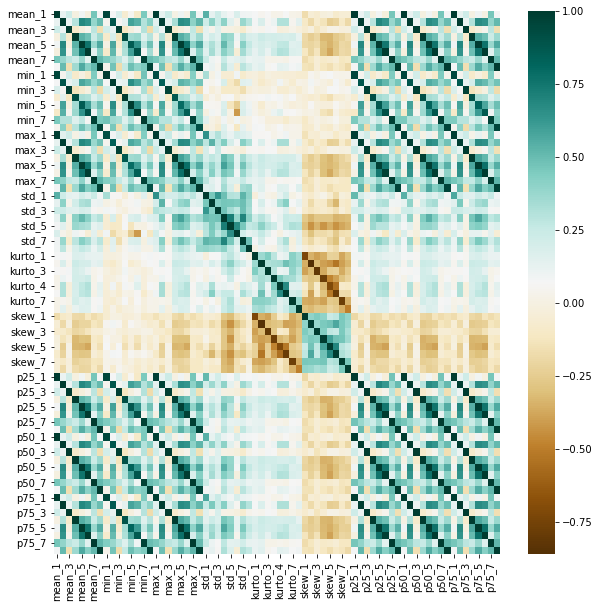

In [68]:
plt.figure(figsize=(10,10))
c = x.corr(method='pearson')
ax = sns.heatmap(c, cmap='BrBG')

In [69]:
corr_features = correlation(x, 0.9)
print(len(set(corr_features)))
print(corr_features)

37
{'p50_1', 'p25_6', 'p50_3', 'p25_3', 'p50_4', 'min_8', 'p25_5', 'max_5', 'p50_5', 'max_8', 'p25_2', 'min_4', 'p25_4', 'p75_7', 'min_1', 'min_7', 'p75_2', 'p75_5', 'p75_1', 'max_3', 'p50_8', 'max_7', 'p75_6', 'max_4', 'max_1', 'p25_8', 'p50_2', 'p75_4', 'min_3', 'p50_6', 'max_6', 'p75_3', 'p50_7', 'max_2', 'p75_8', 'p25_1', 'p25_7'}


In [70]:
pearson_rf = x[['p75_1', 'max_5', 'p50_5', 'min_4', 'max_8', 'p25_4', 'p50_8', 'p75_2', 'p75_6', 'min_3', 'p50_6', 'max_1', 'p25_1', 'p25_3', 'p75_8', 'p25_5', 'p75_5', 'min_7', 'p25_6', 'max_7', 'p25_7', 'p25_8', 'p75_7', 'min_8', 'max_2', 'p25_2', 'p50_2', 'p50_7', 'p75_3', 'p50_1', 'min_1', 'p50_4', 'p75_4', 'max_4', 'max_3', 'max_6', 'p50_3']]
pearson_rf

,p75_1,max_5,p50_5,min_4,max_8,p25_4,p50_8,p75_2,p75_6,min_3,...,p50_7,p75_3,p50_1,min_1,p50_4,p75_4,max_4,max_3,max_6,p50_3
sampling_id,,,,,,,,,,,,,,,,,,,,,
457.0,394.049377,815.783450,807.499592,566.822416,440.130042,568.935258,428.122780,515.116431,869.598844,364.278086,...,457.818923,375.055722,391.032638,384.408905,570.220405,572.022263,576.299115,381.982821,878.560049,372.441071
468.0,477.633290,850.496594,829.259292,579.189098,505.600621,582.630857,495.110334,450.994945,829.171073,504.811095,...,542.361784,534.311726,467.533090,440.799592,585.615335,590.947999,594.431637,554.836474,842.641909,526.867160
470.0,406.131234,796.694170,785.078475,557.724688,488.483441,562.855815,479.719679,387.552324,776.284398,462.139104,...,517.711440,477.894746,399.930678,385.299110,567.640506,569.661252,578.057707,484.682267,789.386846,472.071544
488.0,332.849868,672.616410,657.887029,528.749131,450.595966,534.829787,437.226814,330.420292,586.907017,362.981462,...,464.677311,373.441174,327.837930,320.254164,535.887247,536.933369,539.713065,381.894446,604.336565,367.501691
489.0,321.425672,647.517265,636.804093,517.149878,438.820654,526.407768,433.613750,316.124697,571.992107,362.956717,...,471.828020,369.032464,319.353563,308.839901,528.447359,531.640710,534.818196,377.594691,583.407839,365.326576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11207.0,456.689349,400.585935,384.081379,317.557322,447.514445,328.444530,429.861911,362.318450,639.099601,307.646260,...,430.927296,334.584701,453.417499,423.859675,332.034556,336.449998,340.308158,342.208077,662.669168,333.648373
11208.0,466.361496,392.357828,374.161970,299.991807,455.701164,304.540845,443.057111,331.903763,629.517286,304.330745,...,438.752632,328.598066,460.897468,447.496039,308.918690,315.978751,320.323163,342.893083,635.165503,322.946432
11209.0,471.914084,404.632486,392.258819,310.037160,456.456232,319.251611,452.930120,323.863269,647.817552,299.276813,...,443.021712,327.894724,469.421242,439.927188,320.121098,325.214160,330.596771,333.525170,652.115597,324.876956


In [71]:
x = pearson_rf
y = data_y

scaler = StandardScaler()
scaler.fit(x, y)

cv = KFold(n_splits=10, random_state=1, shuffle=True)
model =   RandomForestClassifier(n_estimators=64)

scores = cross_val_score(model, x, y, scoring='accuracy',
                         cv=cv, n_jobs=-1)

print("Cross-validation scores: ", scores)
print("Mean cross-validation score: ", scores.mean())

Cross-validation scores:  [0.77070064 0.75583864 0.77070064 0.77919321 0.7537155  0.76008493
 0.76433121 0.75159236 0.76808511 0.75744681]
Mean cross-validation score:  0.7631689027420157


In [73]:
dataEksport = data_full.join(data_y)
dataEksport

,mean_1,mean_2,mean_3,mean_4,mean_5,mean_6,mean_7,mean_8,min_1,min_2,...,p50_8,p75_1,p75_2,p75_3,p75_4,p75_5,p75_6,p75_7,p75_8,covid_status
sampling_id,,,,,,,,,,,,,,,,,,,,,
457.0,391.811120,511.176759,372.392556,570.564372,805.706117,868.255397,457.411719,429.147238,384.408905,499.289940,...,428.122780,394.049377,515.116431,375.055722,572.022263,809.343931,869.598844,459.040289,431.669172,1.0
468.0,469.101792,445.483409,527.044728,586.702587,831.748006,824.295481,542.123380,496.043832,440.799592,435.425226,...,495.110334,477.633290,450.994945,534.311726,590.947999,838.308855,829.171073,548.356544,502.486041,0.0
470.0,401.134826,382.895893,472.740969,566.917190,784.549747,771.381253,518.755444,480.509642,385.299110,359.228917,...,479.719679,406.131234,387.552324,477.894746,569.661252,787.120895,776.284398,523.270653,483.901261,1.0
488.0,327.988727,326.461283,369.112173,535.493725,658.513084,576.780891,465.233949,437.767543,320.254164,317.963917,...,437.226814,332.849868,330.420292,373.441174,536.933369,663.149838,586.907017,467.068698,441.662696,1.0
489.0,319.160616,312.565552,366.774607,528.834729,635.434800,565.137312,471.717193,434.375474,308.839901,293.160665,...,433.613750,321.425672,316.124697,369.032464,531.640710,640.415952,571.992107,473.288360,436.641196,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11207.0,453.902591,359.676122,333.961588,332.102249,382.101985,626.040137,429.871521,431.657404,423.859675,345.941268,...,429.861911,456.689349,362.318450,334.584701,336.449998,387.682256,639.099601,432.411550,434.606574,0.0
11208.0,460.792014,328.331819,324.917773,309.534508,376.709489,625.597085,438.931087,443.093199,447.496039,319.526213,...,443.057111,466.361496,331.903763,328.598066,315.978751,384.486202,629.517286,440.896405,453.794848,0.0
11209.0,468.720941,321.426916,325.187972,322.428351,390.364261,636.183988,442.226536,451.315698,439.927188,312.347390,...,452.930120,471.914084,323.863269,327.894724,325.214160,394.208569,647.817552,444.360346,454.297177,0.0


In [75]:
dataEksport.to_csv('data_full_wavelet.csv', index=True)

# Decisian Tree

In [1]:
x = data_mean_min_max_std
y = data_y

scaler = StandardScaler()
scaler.fit(x, y)

cv = KFold(n_splits=10, random_state=1, shuffle=True)
model =   DecisionTreeClassifier()

scores = cross_val_score(model, x, y, scoring='accuracy',
                         cv=cv, n_jobs=-1)

print("Cross-validation scores: ", scores)
print("Mean cross-validation score: ", scores.mean())

NameError: name 'data_mean_min_max_std' is not defined

In [ ]:
x = data_kurto_skew
y = data_y

scaler = StandardScaler()
scaler.fit(x, y)

cv = KFold(n_splits=10, random_state=1, shuffle=True)
model =   DecisionTreeClassifier()

scores = cross_val_score(model, x, y, scoring='accuracy',
                         cv=cv, n_jobs=-1)

print("Cross-validation scores: ", scores)
print("Mean cross-validation score: ", scores.mean())

In [ ]:
x = data_25_50_75
y = data_y

scaler = StandardScaler()
scaler.fit(x, y)

cv = KFold(n_splits=10, random_state=1, shuffle=True)
model =   DecisionTreeClassifier()

scores = cross_val_score(model, x, y, scoring='accuracy',
                         cv=cv, n_jobs=-1)

print("Cross-validation scores: ", scores)
print("Mean cross-validation score: ", scores.mean())

In [ ]:
x = data_full
y = data_y

scaler = StandardScaler()
scaler.fit(x, y)

cv = KFold(n_splits=10, random_state=1, shuffle=True)
model =   DecisionTreeClassifier()

scores = cross_val_score(model, x, y, scoring='accuracy',
                         cv=cv, n_jobs=-1)

print("Cross-validation scores: ", scores)
print("Mean cross-validation score: ", scores.mean())

In [ ]:
plt.figure(figsize=(10,10))
c = x.corr(method='pearson')
ax = sns.heatmap(c, cmap='BrBG')

In [ ]:
corr_features = correlation(x, 0.9)
print(len(set(corr_features)))
print(corr_features)

In [ ]:
pearson_dt = x[['p75_1', 'max_5', 'p50_5', 'min_4', 'max_8', 'p25_4', 'p50_8', 'p75_2', 'p75_6', 'min_3', 'p50_6', 'max_1', 'p25_1', 'p25_3', 'p75_8', 'p25_5', 'p75_5', 'min_7', 'p25_6', 'max_7', 'p25_7', 'p25_8', 'p75_7', 'min_8', 'max_2', 'p25_2', 'p50_2', 'p50_7', 'p75_3', 'p50_1', 'min_1', 'p50_4', 'p75_4', 'max_4', 'max_3', 'max_6', 'p50_3']]
pearson_dt

In [ ]:
x = pearson_dt
y = data_y

scaler = StandardScaler()
scaler.fit(x, y)

cv = KFold(n_splits=10, random_state=1, shuffle=True)
model =   DecisionTreeClassifier()

scores = cross_val_score(model, x, y, scoring='accuracy',
                         cv=cv, n_jobs=-1)

print("Cross-validation scores: ", scores)
print("Mean cross-validation score: ", scores.mean())

# KNN

In [ ]:
x = data_mean_min_max_std
y = data_y

scaler = StandardScaler()
scaler.fit(x, y)

cv = KFold(n_splits=10, random_state=1, shuffle=True)
model =   KNeighborsClassifier()

scores = cross_val_score(model, x, y, scoring='accuracy',
                         cv=cv, n_jobs=-1)

print("Cross-validation scores: ", scores)
print("Mean cross-validation score: ", scores.mean())

In [ ]:
x = data_kurto_skew
y = data_y

scaler = StandardScaler()
scaler.fit(x, y)

cv = KFold(n_splits=10, random_state=1, shuffle=True)
model =   KNeighborsClassifier()

scores = cross_val_score(model, x, y, scoring='accuracy',
                         cv=cv, n_jobs=-1)

print("Cross-validation scores: ", scores)
print("Mean cross-validation score: ", scores.mean())

In [ ]:
x = data_25_50_75
y = data_y

scaler = StandardScaler()
scaler.fit(x, y)

cv = KFold(n_splits=10, random_state=1, shuffle=True)
model =   KNeighborsClassifier()

scores = cross_val_score(model, x, y, scoring='accuracy',
                         cv=cv, n_jobs=-1)

print("Cross-validation scores: ", scores)
print("Mean cross-validation score: ", scores.mean())

In [ ]:
x = data_full
y = data_y

scaler = StandardScaler()
scaler.fit(x, y)

cv = KFold(n_splits=10, random_state=1, shuffle=True)
model =   KNeighborsClassifier()

scores = cross_val_score(model, x, y, scoring='accuracy',
                         cv=cv, n_jobs=-1)

print("Cross-validation scores: ", scores)
print("Mean cross-validation score: ", scores.mean())

In [ ]:
plt.figure(figsize=(10,10))
c = x.corr(method='pearson')
ax = sns.heatmap(c, cmap='BrBG')

In [ ]:
corr_features = correlation(x, 0.9)
print(len(set(corr_features)))
print(corr_features)

In [ ]:
pearson_knn = data_full[['p75_1', 'max_5', 'p50_5', 'min_4', 'max_8', 'p25_4', 'p50_8', 'p75_2', 'p75_6', 'min_3', 'p50_6', 'max_1', 'p25_1', 'p25_3', 'p75_8', 'p25_5', 'p75_5', 'min_7', 'p25_6', 'max_7', 'p25_7', 'p25_8', 'p75_7', 'min_8', 'max_2', 'p25_2', 'p50_2', 'p50_7', 'p75_3', 'p50_1', 'min_1', 'p50_4', 'p75_4', 'max_4', 'max_3', 'max_6', 'p50_3']]
pearson_knn

In [ ]:
x = pearson_knn
y = data_y

scaler = StandardScaler()
scaler.fit(x, y)

cv = KFold(n_splits=10, random_state=1, shuffle=True)
model =   KNeighborsClassifier()

scores = cross_val_score(model, x, y, scoring='accuracy',
                         cv=cv, n_jobs=-1)

print("Cross-validation scores: ", scores)
print("Mean cross-validation score: ", scores.mean())

# SVM

In [ ]:
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
x = data_full
y = data_y

param_grid = {
#     'reduce_dim__n_components':[10],
    'model__C'    : [1,10,100],
    'model__gamma': [0,1],
            }
pipe = Pipeline([('standardscaler',StandardScaler()),
#                     ('reduce_dim',PCA()),
                 ('model',SVC())
#                     ('model',KNeighborsClassifier(n_neighbors=4))
#                     ('model', GaussianNB())
#                    ('model', DecisionTreeClassifier())
#                     ('model', RandomForestClassifier(max_depth=2, random_state=0))
#                     ('model', LinearDiscriminantAnalysis())
                ])
grid = GridSearchCV(pipe,param_grid=param_grid,cv=cv,
                    scoring='accuracy', n_jobs=-1)


grid.fit(x,y)
scores = cross_val_score(grid.best_estimator_, 
                         x, y, 
                        cv=cv)
print("Cross-validation scores: ", scores)
print("Mean cross-validation score: ", scores.mean()) 
print("parameter%s",grid.best_params_)

# print("Cross-validation scores: ", scores)
# print("Mean cross-validation score: ", scores.mean())

In [ ]:
x = data_full
y = data_y

param_grid = {
    'reduce_dim__n_components':[10],
    'model__C'    : [1,10,100],
    'model__gamma': [0,1],
            }
pipe = Pipeline([('standardscaler',StandardScaler()),
                 ('reduce_dim',PCA()),
                 ('model',SVC())
#                     ('model',KNeighborsClassifier(n_neighbors=4))
#                     ('model', GaussianNB())
#                    ('model', DecisionTreeClassifier())
#                     ('model', RandomForestClassifier(max_depth=2, random_state=0))
#                     ('model', LinearDiscriminantAnalysis())
                ])
grid = GridSearchCV(pipe,param_grid=param_grid,cv=cv,
                    scoring='accuracy', n_jobs=-1)


grid.fit(x,y)
scores = cross_val_score(grid.best_estimator_, 
                         x, y, 
                        cv=cv)
print("Cross-validation scores: ", scores)
print("Mean cross-validation score: ", scores.mean()) 
print("parameter%s",grid.best_params_)

In [ ]:
plt.figure(figsize=(10,10))
c = x.corr(method='pearson')
ax = sns.heatmap(c, cmap='BrBG')

In [ ]:
corr_features = correlation(x, 0.9)
print(len(set(corr_features)))
print(corr_features)

In [ ]:
pearson_svm = x[['p75_1', 'max_5', 'p50_5', 'min_4', 'max_8', 'p25_4', 'p50_8', 'p75_2', 'p75_6', 'min_3', 'p50_6', 'max_1', 'p25_1', 'p25_3', 'p75_8', 'p25_5', 'p75_5', 'min_7', 'p25_6', 'max_7', 'p25_7', 'p25_8', 'p75_7', 'min_8', 'max_2', 'p25_2', 'p50_2', 'p50_7', 'p75_3', 'p50_1', 'min_1', 'p50_4', 'p75_4', 'max_4', 'max_3', 'max_6', 'p50_3']]
pearson_svm

In [ ]:
x = pearson_svm
y = data_y

param_grid = {
    'reduce_dim__n_components':[10],
    'model__C'    : [1,10,100],
    'model__gamma': [0,1],
            }
pipe = Pipeline([('standardscaler',StandardScaler()),
                 ('reduce_dim',PCA()),
                 ('model',SVC())
#                     ('model',KNeighborsClassifier(n_neighbors=4))
#                     ('model', GaussianNB())
#                    ('model', DecisionTreeClassifier())
#                     ('model', RandomForestClassifier(max_depth=2, random_state=0))
#                     ('model', LinearDiscriminantAnalysis())
                ])
grid = GridSearchCV(pipe,param_grid=param_grid,cv=cv,
                    scoring='accuracy', n_jobs=-1)


grid.fit(x,y)
scores = cross_val_score(grid.best_estimator_, 
                         x, y, 
                        cv=cv)
print("Cross-validation scores: ", scores)
print("Mean cross-validation score: ", scores.mean()) 
print("parameter%s",grid.best_params_)

In [ ]:
x = data_mean_min_max_std
y = data_y

param_grid = {
    'reduce_dim__n_components':[10],
    'model__C'    : [1,10,100],
    'model__gamma': [0,1],
            }
pipe = Pipeline([('standardscaler',StandardScaler()),
                 ('reduce_dim',PCA()),
                 ('model',SVC())
#                     ('model',KNeighborsClassifier(n_neighbors=4))
#                     ('model', GaussianNB())
#                    ('model', DecisionTreeClassifier())
#                     ('model', RandomForestClassifier(max_depth=2, random_state=0))
#                     ('model', LinearDiscriminantAnalysis())
                ])
grid = GridSearchCV(pipe,param_grid=param_grid,cv=cv,
                    scoring='accuracy', n_jobs=-1)


grid.fit(x,y)
scores = cross_val_score(grid.best_estimator_, 
                         x, y, 
                        cv=cv)
print("Cross-validation scores: ", scores)
print("Mean cross-validation score: ", scores.mean()) 
print("parameter%s",grid.best_params_)

In [ ]:
x = data_kurto_skew
y = data_y

param_grid = {
    'reduce_dim__n_components':[10],
    'model__C'    : [1,10,100],
    'model__gamma': ['auto'],
            }
pipe = Pipeline([('standardscaler',StandardScaler()),
                 ('reduce_dim',PCA()),
                 ('model',SVC())
#                     ('model',KNeighborsClassifier(n_neighbors=4))
#                     ('model', GaussianNB())
#                    ('model', DecisionTreeClassifier())
#                     ('model', RandomForestClassifier(max_depth=2, random_state=0))
#                     ('model', LinearDiscriminantAnalysis())
                ])
cv = KFold(n_splits=10, random_state=1, shuffle=True)
grid = GridSearchCV(pipe,param_grid=param_grid,cv=cv,
                    scoring='accuracy', n_jobs=-1)


grid.fit(x,y)
scores = cross_val_score(grid.best_estimator_, 
                         x, y, 
                        cv=cv)
print("Cross-validation scores: ", scores)
print("Mean cross-validation score: ", scores.mean()) 
print("parameter%s",grid.best_params_)

In [ ]:
x = data_full
y = data_y

param_grid = {
    'reduce_dim__n_components':[10],
#     'model__C'    : [1,10,100],
#     'model__gamma': ['auto'],
            }
pipe = Pipeline([('standardscaler',StandardScaler()),
                 ('reduce_dim',PCA()),
#                  ('model',SVC())
#                     ('model',KNeighborsClassifier(n_neighbors=4))
#                     ('model', GaussianNB())
#                    ('model', DecisionTreeClassifier())
                 ('model', RandomForestClassifier(n_estimators=64))
#                     ('model', LinearDiscriminantAnalysis())
                ])
cv = KFold(n_splits=10, random_state=1, shuffle=True)
grid = GridSearchCV(pipe,param_grid=param_grid,cv=cv,
                    scoring='accuracy', n_jobs=-1)


grid.fit(x,y)
scores = cross_val_score(grid.best_estimator_, 
                         x, y, 
                        cv=cv)
print("Cross-validation scores: ", scores)
print("Mean cross-validation score: ", scores.mean()) 
print("parameter%s",grid.best_params_)

In [ ]:
plt.figure(figsize=(10,10))
c = x.corr(method='pearson')
ax = sns.heatmap(c, cmap='BrBG')

In [ ]:
corr_features = correlation(x, 0.9)
print(len(set(corr_features)))
print(corr_features)

In [ ]:
pearson_rf2 = x[['p75_1', 'max_5', 'p50_5', 'min_4', 'max_8', 'p25_4', 'p50_8', 'p75_2', 'p75_6', 'min_3', 'p50_6', 'max_1', 'p25_1', 'p25_3', 'p75_8', 'p25_5', 'p75_5', 'min_7', 'p25_6', 'max_7', 'p25_7', 'p25_8', 'p75_7', 'min_8', 'max_2', 'p25_2', 'p50_2', 'p50_7', 'p75_3', 'p50_1', 'min_1', 'p50_4', 'p75_4', 'max_4', 'max_3', 'max_6', 'p50_3']]
pearson_rf2

In [ ]:
x = pearson_rf2
y = data_y

param_grid = {
    'reduce_dim__n_components':[10],
#     'model__C'    : [1,10,100],
#     'model__gamma': ['auto'],
            }
pipe = Pipeline([('standardscaler',StandardScaler()),
                 ('reduce_dim',PCA()),
#                  ('model',SVC())
#                     ('model',KNeighborsClassifier(n_neighbors=4))
#                     ('model', GaussianNB())
#                    ('model', DecisionTreeClassifier())
                 ('model', RandomForestClassifier(n_estimators=64))
#                     ('model', LinearDiscriminantAnalysis())
                ])
cv = KFold(n_splits=10, random_state=1, shuffle=True)
grid = GridSearchCV(pipe,param_grid=param_grid,cv=cv,
                    scoring='accuracy', n_jobs=-1)


grid.fit(x,y)
scores = cross_val_score(grid.best_estimator_, 
                         x, y, 
                        cv=cv)
print("Cross-validation scores: ", scores)
print("Mean cross-validation score: ", scores.mean()) 
print("parameter%s",grid.best_params_)

# DNN

In [ ]:
# pip install keras

In [ ]:
# pip install tensorflow

In [ ]:
import tensorflow
from keras.models import Sequential
from keras.layers import Dense, Activation